In [78]:
# ez most t√∂k√©letesen m≈±k√∂dik 2024.05.11. 10:38
# √∫j m√≥don, import√°lt TZ f√ºggv√©nyekkel

###Tedd el√©rhet≈ëv√© a "df_EFC_CZ_post_analyzing_merged.csv √©s "TZ_functions.py" f√°jlokat
Ha Google Colabban futtatod, t√∂ltsd fel √©s csomagoltasd ki a "Flyball_input.zip" f√°jlt. Ha nem abban, l√©pd √°t ezeket a cell√°kat.

In [79]:
######### 240502 ######## Google Colab-ba f√°jlok felt√∂lt√©se
from google.colab import files
import os

# Minden kor√°bbi f√°jl √©s mappa t√∂rl√©se a Colab k√∂rnyezetben
files_and_folders = os.listdir()
for item in files_and_folders:
    if os.path.isfile(item):
        os.remove(item)

# F√°jlok felt√∂lt√©se
uploaded_files = files.upload()

# A felt√∂lt√∂tt f√°jlok neveinek kinyer√©se
file_name = list(uploaded_files.keys())[0]

Saving Flyball_input.zip to Flyball_input.zip


In [80]:
### 240502 ### Google Colab-ban ZIP file kicsomagol√°sa
from zipfile import ZipFile

with ZipFile(file_name, 'r') as zipfile2:
    zipfile2.extractall()
    print('Kicsomagolt f√°jlok:')
    for name in zipfile2.namelist():
        print(name)
    print('Done')

Kicsomagolt f√°jlok:
df_EFC_output.csv
df_CZ_output.csv
Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx
FLYBALLCZ_versenyadatok.xlsx
EFC_versenyadatok.xlsx
TZ_functions.py
df_EFC_CZ_track_good-date.csv
df_WRFT_output.csv
df_events.csv
df_EFC_CZ_post_analyzing_merged.csv
df_EFC_CZ_Weather.csv
Done


# alap importok √©s mindenf√©le megjelen√≠t√©si be√°ll√≠t√°sok, kikommentelve ig√©ny szerint:

In [81]:
from IPython.display import display, HTML
import pandas as pd

# Be√°ll√≠t√°sok
pd.set_option('display.max_rows', False)           # Az √∂sszes sor megjelen√≠t√©se
pd.set_option('display.max_colwidth', None)        # Teljes m√©ret≈± sz√∂veges oszlopok
pd.set_option('display.expand_frame_repr', False)  # DataFrame v√≠zszintes kiterjeszt√©se kikapcsolva
pd.set_option('display.max_columns', 0)            # Az √∂sszes oszlop megjelen√≠t√©se

In [82]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import shutil
sns.set(style="ticks")
seed=42
np.random.seed(seed)
#maxim√°lis oszlopsz√°m megjelen√≠t√©se
pd.options.display.max_columns = 20

In [83]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [84]:
pd.options.display.max_colwidth =300

# SAJ√ÅT F√úGGV√âNYEK:

In [85]:
# bet√∂lt√∂m a 'TZ_functions.py' f√°jlban tal√°lhat√≥ saj√°t gy√°rt√°s√∫, rendszeresen haszn√°lt f√ºggv√©nyeket
get_ipython().run_line_magic('run', 'TZ_functions.py')

 ############### ADATDOKI f√ºggv√©nyei   ############### 
 ############### TZ_functions.py       ############### 
 ############### version = 2024.05.11. ############### 
A li() f√ºggv√©ny list√°z√°sn√°l, legyen alap√©rtelmezett a sorok sz√°ma?
 0 = ne legyen, azaz list√°z√°skor r√°k√©rdez. Vagy sz√°m = ennyi sort list√°z r√°k√©rdez√©s n√©lk√ºl. ("enter" v√°ltoz√≥)6


<Figure size 640x480 with 0 Axes>

##itt indul az API-z√°s

In [86]:
import requests
import json

In [87]:
API_key = '#ide √≠rd be a saj√°t API kulcsodat' #ide √≠rd be a saj√°t API kulcsodat

#### F√©lautomata lek√©rdez√©s m√≥d

In [141]:
key = API_key
q = 'Nove Mesto pod Smrkem'
dt = '2023-07-02'

In [142]:
url = 'http://api.weatherapi.com/v1/history.json'

In [143]:
real_url = f"{url}&?key={key}&q={q}&dt={dt}"

In [144]:
response = requests.get(real_url)

In [145]:
# egy pr√≥ba helysz√≠n lek√©r√©se
print(response.json())

{'location': {'name': 'Nove Mesto Pod Smrkem', 'region': 'Ustecky kraj', 'country': 'Czech Republic', 'lat': 50.92, 'lon': 15.23, 'tz_id': 'Europe/Prague', 'localtime_epoch': 1718022464, 'localtime': '2024-06-10 14:27'}, 'forecast': {'forecastday': [{'date': '2023-07-02', 'date_epoch': 1688256000, 'day': {'maxtemp_c': 19.9, 'maxtemp_f': 67.8, 'mintemp_c': 13.8, 'mintemp_f': 56.8, 'avgtemp_c': 16.7, 'avgtemp_f': 62.0, 'maxwind_mph': 10.5, 'maxwind_kph': 16.9, 'totalprecip_mm': 3.6, 'totalprecip_in': 0.14, 'totalsnow_cm': 0.0, 'avgvis_km': 7.5, 'avgvis_miles': 4.0, 'avghumidity': 79, 'daily_will_it_rain': 1, 'daily_chance_of_rain': 100, 'daily_will_it_snow': 0, 'daily_chance_of_snow': 0, 'condition': {'text': 'Heavy rain at times', 'icon': '//cdn.weatherapi.com/weather/64x64/day/305.png', 'code': 1192}, 'uv': 4.0}, 'astro': {'sunrise': '04:50 AM', 'sunset': '09:16 PM', 'moonrise': '09:05 PM', 'moonset': '03:00 AM', 'moon_phase': 'Waxing Gibbous', 'moon_illumination': 97}, 'hour': [{'time

In [146]:
# m≈±k√∂d√∂tt, √≠gy h√°t f√ºggv√©ny k√©sz√ºlt bel≈ële
import requests

def get_weather_history(key, q, dt):
    url = 'http://api.weatherapi.com/v1/history.json'
    params = {
        'key': key,
        'q': q,
        'dt': dt
    }
    response = requests.get(url, params=params)
    return response.json()

# P√©lda haszn√°lat:
key = API_key
q = 'Nove Mesto pod Smrkem'
dt = '2023-07-02'
weather_data = get_weather_history(key, q, dt)
print(weather_data)


{'location': {'name': 'Nove Mesto Pod Smrkem', 'region': 'Ustecky kraj', 'country': 'Czech Republic', 'lat': 50.92, 'lon': 15.23, 'tz_id': 'Europe/Prague', 'localtime_epoch': 1718022386, 'localtime': '2024-06-10 14:26'}, 'forecast': {'forecastday': [{'date': '2023-07-02', 'date_epoch': 1688256000, 'day': {'maxtemp_c': 19.9, 'maxtemp_f': 67.8, 'mintemp_c': 13.8, 'mintemp_f': 56.8, 'avgtemp_c': 16.7, 'avgtemp_f': 62.0, 'maxwind_mph': 10.5, 'maxwind_kph': 16.9, 'totalprecip_mm': 3.6, 'totalprecip_in': 0.14, 'totalsnow_cm': 0.0, 'avgvis_km': 7.5, 'avgvis_miles': 4.0, 'avghumidity': 79, 'daily_will_it_rain': 1, 'daily_chance_of_rain': 100, 'daily_will_it_snow': 0, 'daily_chance_of_snow': 0, 'condition': {'text': 'Heavy rain at times', 'icon': '//cdn.weatherapi.com/weather/64x64/day/305.png', 'code': 1192}, 'uv': 4.0}, 'astro': {'sunrise': '04:50 AM', 'sunset': '09:16 PM', 'moonrise': '09:05 PM', 'moonset': '03:00 AM', 'moon_phase': 'Waxing Gibbous', 'moon_illumination': 97}, 'hour': [{'time

In [147]:
# sz≈±k√≠tem a lek√©rt adatokat
import requests

def get_weather_history(key, q, dt):
    url = 'http://api.weatherapi.com/v1/history.json'
    params = {
        'key': key,
        'q': q,
        'dt': dt
    }
    response = requests.get(url, params=params)
    data = response.json()
    if 'error' in data:
        return data['error']
    else:
        print(q)
        return {
            'temperature': data['forecast']['forecastday'][0]['day']['avgtemp_c'],
            'wind_speed': data['forecast']['forecastday'][0]['day']['maxwind_kph'],
            'humidity': data['forecast']['forecastday'][0]['day']['avghumidity'],
            'precipitation': data['forecast']['forecastday'][0]['day']['totalprecip_mm']
        }

# P√©lda haszn√°lat:
key = API_key
q = 'Vodnany'
dt = '2023-07-02'
weather_data = get_weather_history(key, q, dt)
print(weather_data)


Vodnany
{'temperature': 18.4, 'wind_speed': 25.9, 'humidity': 67, 'precipitation': 0.0}


El kellett k√©sz√≠teni a d√°tumokhoz kapcsol√≥d√≥ helysz√≠nek list√°j√°t. Rettenet mennyis√©g≈± pr√≥b√°lkoz√°s volt automatikus Python k√≥dot √≠rni, ami hiba n√©lk√ºl k√©sz√≠t egy ezt tartalmaz√≥ dataframe-t. Nem siker√ºlt. Az adatokban szerepl≈ë dupla napok valahogy mindig bezavartak a d√°tumkezel√©sbe. Maradt h√°t a k√©zi lista.

In [148]:
events_data = """Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 1-2.
Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 20-21.
Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 14-15.
Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 14-15.
Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 6-7.
Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 6-7.
M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 15-16.
K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 16-17.
MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 10-11.
Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 3-4.
BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 24-25.
EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.
EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.
EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.
Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 22-23.
EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29."""

In [150]:
"""
#20240419 majdnem j√≥ esem√©nylista
import pandas as pd

data = [
    ("Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 1.", "Nov√© Mƒõsto pod Smrkem", "2023. j√∫lius 1.", "2023-07-01"),
    ("Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 2.", "Nov√© Mƒõsto pod Smrkem", "2023. j√∫lius 2.", "2023-07-02"),
    ("Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 20.", "Bl≈°any", "2023. m√°jus 20.", "2023-05-20"),
    ("Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 21.", "Bl≈°any", "2023. m√°jus 21.", "2023-05-21"),
    ("Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 14.", "Vod≈àany", "2023. okt√≥ber 14.", "2023-10-14"),
    ("Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 15.", "Vod≈àany", "2023. okt√≥ber 15.", "2023-10-15"),
    ("Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 14.", "Vod≈àany", "2023. okt√≥ber 14.", "2023-10-14"),
    ("Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 15.", "Vod≈àany", "2023. okt√≥ber 15.", "2023-10-15"),
    ("Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 6.", "≈Ωamberk", "2023. m√°jus 6.", "2023-05-06"),
    ("Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 7.", "≈Ωamberk", "2023. m√°jus 7.", "2023-05-07"),
    ("Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 6.", "≈Ωamberk", "2023. m√°jus 6.", "2023-05-06"),
    ("Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 7.", "≈Ωamberk", "2023. m√°jus 7.", "2023-05-07"),
    ("M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 15.", "Lou≈àovice", "2023. j√∫lius 15.", "2023-07-15"),
    ("M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 16.", "Lou≈àovice", "2023. j√∫lius 16.", "2023-07-16"),
    ("K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 16.", "Litomy≈°l", "2023. szeptember 16.", "2023-09-16"),
    ("K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 17.", "Litomy≈°l", "2023. szeptember 17.", "2023-09-17"),
    ("MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 10.", "Pl√°nƒõ", "2023. j√∫nius 10.", "2023-06-10"),
    ("MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 11.", "Pl√°nƒõ", "2023. j√∫nius 11.", "2023-06-11"),
    ("Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 3.", "Bl≈°any", "2023. szeptember 3.", "2023-09-03"),
    ("Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 4.", "Bl≈°any", "2023. szeptember 4.", "2023-09-04"),
    ("BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 24.", "Prostƒõjov", "2023. j√∫nius 24.", "2023-06-24"),
    ("BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 25.", "Prostƒõjov", "2023. j√∫nius 25.", "2023-06-25"),
    ("EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 30.", "2023-07-30"),
    ("EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 30.", "2023-07-30"),
    ("EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 29.", "2023-07-29"),
    ("Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 22.", "Heroltice", "2023. √°prilis 22.", "2023-04-22"),
    ("Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 23.", "Heroltice", "2023. √°prilis 23.", "2023-04-23"),
    ("EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 29.", "2023-07-29")
]

# DataFrame l√©trehoz√°sa
df_events_weather = pd.DataFrame(data, columns=['event_all', 'location', 'formatted_date', 'event_date'])
di(df_events_weather)
"""

In [151]:
#20240419 ez a j√≥ esem√©nylista
import pandas as pd

data1 = [
    ("Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 1.", "Nov√© Mƒõsto pod Smrkem", "2023. j√∫lius 1.", "2023-07-01"),
    ("Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 2.", "Nov√© Mƒõsto pod Smrkem", "2023. j√∫lius 2.", "2023-07-02"),
    ("Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 20.", "Bl≈°any", "2023. m√°jus 20.", "2023-05-20"),
    ("Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 21.", "Bl≈°any", "2023. m√°jus 21.", "2023-05-21"),
    ("Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 14.", "Vod≈àany", "2023. okt√≥ber 14.", "2023-10-14"),
    ("Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 15.", "Vod≈àany", "2023. okt√≥ber 15.", "2023-10-15"),
    ("Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 14.", "Vod≈àany", "2023. okt√≥ber 14.", "2023-10-14"),
    ("Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 15.", "Vod≈àany", "2023. okt√≥ber 15.", "2023-10-15"),
    ("Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 6.", "≈Ωamberk", "2023. m√°jus 6.", "2023-05-06"),
    ("Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 7.", "≈Ωamberk", "2023. m√°jus 7.", "2023-05-07"),
    ("Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 6.", "≈Ωamberk", "2023. m√°jus 6.", "2023-05-06"),
    ("Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 7.", "≈Ωamberk", "2023. m√°jus 7.", "2023-05-07"),
    ("M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 15.", "Lou≈àovice", "2023. j√∫lius 15.", "2023-07-15"),
    ("M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 16.", "Lou≈àovice", "2023. j√∫lius 16.", "2023-07-16"),
    ("K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 16.", "Litomy≈°l", "2023. szeptember 16.", "2023-09-16"),
    ("K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 17.", "Litomy≈°l", "2023. szeptember 17.", "2023-09-17"),
    ("MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 10.", "Pl√°nƒõ", "2023. j√∫nius 10.", "2023-06-10"),
    ("MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 11.", "Pl√°nƒõ", "2023. j√∫nius 11.", "2023-06-11"),
    ("Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 3.", "Bl≈°any", "2023. szeptember 3.", "2023-09-03"),
    ("Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 4.", "Bl≈°any", "2023. szeptember 4.", "2023-09-04"),
    ("BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 24.", "Prostƒõjov", "2023. j√∫nius 24.", "2023-06-24"),
    ("BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 25.", "Prostƒõjov", "2023. j√∫nius 25.", "2023-06-25"),
    ("EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 30.", "2023-07-30"),
    ("EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 30.", "2023-07-30"),
    ("EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 29.", "2023-07-29"),
    ("Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 22.", "Heroltice", "2023. √°prilis 22.", "2023-04-22"),
    ("Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 23.", "Heroltice", "2023. √°prilis 23.", "2023-04-23"),
    ("EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.", "T√°pi√≥szentm√°rton", "2023. j√∫lius 29.", "2023-07-29")
]

data2 = [
    "Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 1-2.",
    "Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 1-2.",
    "Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 20-21.",
    "Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 20-21.",
    "Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 14-15.",
    "Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 14-15.",
    "Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 14-15.",
    "Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 14-15.",
    "Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 6-7.",
    "Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 6-7.",
    "Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 6-7.",
    "Eager¬¥s Cup 1. ring (≈Ωamberk) 2023. m√°jus 6-7.",
    "M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 15-16.",
    "M√°chale, spadlo ti to! (Lou≈àovice) 2023. j√∫lius 15-16.",
    "K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 16-17.",
    "K≈ôupky na b≈ôehu (Litomy≈°l) 2023. szeptember 16-17.",
    "MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 10-11.",
    "MED's Trophy (Pl√°nƒõ) 2023. j√∫nius 10-11.",
    "Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 3-4.",
    "Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 3-4.",
    "BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 24-25.",
    "BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 24-25.",
    "EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.",
    "EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.",
    "EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.",
    "Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 22-23.",
    "Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 22-23.",
    "EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29."
]

df1 = pd.DataFrame(data1, columns=["Event", "Location", "Date", "ISO_Date"])
df2 = pd.DataFrame(data2, columns=["1"])

# Merge dataframes
df_events_weather = pd.concat([df1, df2.reset_index(drop=True)], axis=1)

di(df_events_weather)


In [98]:
df1

Event               Location                 Date    ISO_Date
0          Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 1.  Nov√© Mƒõsto pod Smrkem      2023. j√∫lius 1.  2023-07-01
1          Crazy Cup (Nov√© Mƒõsto pod Smrkem) 2023. j√∫lius 2.  Nov√© Mƒõsto pod Smrkem      2023. j√∫lius 2.  2023-07-02
2                 Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 20.                 Bl≈°any      2023. m√°jus 20.  2023-05-20
3                 Flyvaryors turnaj (Bl≈°any) 2023. m√°jus 21.                 Bl≈°any      2023. m√°jus 21.  2023-05-21
4       Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 14.                Vod≈àany    2023. okt√≥ber 14.  2023-10-14
5       Budƒõjckej xtreme 2. ring (Vod≈àany) 2023. okt√≥ber 15.                Vod≈àany    2023. okt√≥ber 15.  2023-10-15
6       Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 14.                Vod≈àany    2023. okt√≥ber 14.  2023-10-14
7       Budƒõjckej xtreme 1. ring (Vod≈àany) 2023. okt√≥ber 15.                Vod≈àany    2023. okt√≥ber 15.  2023-10-15
8               Eager¬¥s Cup 2. ring (≈Ωamberk) 2023. m√°jus 6.                ≈Ωamberk       2023. m√°jus 6.  2023-05-06
..                                                       ...                    ...                  ...         ...
19  Mistrovstv√≠ ƒåesk√© republiky (Bl≈°any) 2023. szeptember 4.                 Bl≈°any  2023. szeptember 4.  2023-09-04
20            BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 24.              Prostƒõjov     2023. j√∫nius 24.  2023-06-24
21            BCCCZ mistrovstv√≠ (Prostƒõjov) 2023. j√∫nius 25.              Prostƒõjov     2023. j√∫nius 25.  2023-06-25
22          EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.       T√°pi√≥szentm√°rton     2023. j√∫lius 30.  2023-07-30
23          EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 30.       T√°pi√≥szentm√°rton     2023. j√∫lius 30.  2023-07-30
24          EFC - Ring 1 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.       T√°pi√≥szentm√°rton     2023. j√∫lius 29.  2023-07-29
25             Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 22.              Heroltice    2023. √°prilis 22.  2023-04-22
26             Han√°ck√© ≈°kvarek (Heroltice) 2023. √°prilis 23.              Heroltice    2023. √°prilis 23.  2023-04-23
27          EFC - Ring 2 (T√°pi√≥szentm√°rton) 2023. j√∫lius 29.       T√°pi√≥szentm√°rton     2023. j√∫lius 29.  2023-07-29

[28 rows x 4 columns]

In [152]:
# Ezt a k√∂vetkez≈ë cella hib√°ja est√©n futtasd le el≈ëtte.
#!pip install unidecode

In [155]:
# Csak angol nevekkel m≈±k√∂dik az API lek√©rdez√©s
from unidecode import unidecode

# √öj oszlop l√©trehoz√°sa a helysz√≠nek angolra cser√©lt verzi√≥ival
df_events_weather['Location_English'] = df_events_weather['Location'].apply(lambda x: unidecode(x))

# Kimenet ki√≠rat√°sa
di(df_events_weather)


In [156]:

import requests
import pandas as pd

# Az API kulcs
key = API_key

# F√ºggv√©ny a helysz√≠n, d√°tum alapj√°n id≈ëj√°r√°si adatok lek√©r√©s√©re
def get_weather_history(location, date):
    url = 'http://api.weatherapi.com/v1/history.json'
    real_url = f"{url}?key={key}&q={location}&dt={date}"
    response = requests.get(real_url)
    data = response.json()
    return data['forecast']['forecastday'][0]['hour'][0]

# Bet√∂lt√©s df_events_weather
#df_events_weather = pd.read_csv('df_events_weather.csv')

# Iter√°l√°s √©s adatok kieg√©sz√≠t√©se
for index, row in df_events_weather.iterrows():
    location = row['Location_English']
    date = row['ISO_Date']
    print(location, date)
    weather_data = get_weather_history(location, date)
    df_events_weather.at[index, 'temperature_c'] = weather_data['temp_c']
    df_events_weather.at[index, 'wind_speed_kph'] = weather_data['wind_kph']
    df_events_weather.at[index, 'humidity_%'] = weather_data['humidity']
    df_events_weather.at[index, 'precipitation_mm'] = weather_data['precip_mm']

# Eredm√©ny megjelen√≠t√©se
li(df_events_weather)


Nove Mesto pod Smrkem 2023-07-01
Nove Mesto pod Smrkem 2023-07-02
Blsany 2023-05-20


KeyError: 'forecast'

### √ögy t≈±nik az ingyenes API kulcs korl√°tj√°ba √ºtk√∂ztem. 9 db-ot lek√©rdez, ut√°na hib√°t dob.

In [102]:
"""
Nove Mesto pod Smrkem 2023-07-01
Nove Mesto pod Smrkem 2023-07-02
Blsany 2023-05-20
Blsany 2023-05-21
Vodnany 2023-10-14
Vodnany 2023-10-15
Vodnany 2023-10-14
Vodnany 2023-10-15
Zamberk 2023-05-06
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-27-b11d7bb43628> in <cell line: 19>()
     21     date = row['ISO_Date']
     22     print(location, date)
---> 23     weather_data = get_weather_history(location, date)
     24     df_events_weather.at[index, 'temperature_c'] = weather_data['temp_c']
     25     df_events_weather.at[index, 'wind_speed_kph'] = weather_data['wind_kph']

<ipython-input-27-b11d7bb43628> in get_weather_history(location, date)
     11     response = requests.get(real_url)
     12     data = response.json()
---> 13     return data['forecast']['forecastday'][0]['hour'][0]
     14
     15 # Bet√∂lt√©s df_events_weather

KeyError: 'forecast'
"""

"\nNove Mesto pod Smrkem 2023-07-01\nNove Mesto pod Smrkem 2023-07-02\nBlsany 2023-05-20\nBlsany 2023-05-21\nVodnany 2023-10-14\nVodnany 2023-10-15\nVodnany 2023-10-14\nVodnany 2023-10-15\nZamberk 2023-05-06\n---------------------------------------------------------------------------\nKeyError                                  Traceback (most recent call last)\n<ipython-input-27-b11d7bb43628> in <cell line: 19>()\n     21     date = row['ISO_Date']\n     22     print(location, date)\n---> 23     weather_data = get_weather_history(location, date)\n     24     df_events_weather.at[index, 'temperature_c'] = weather_data['temp_c']\n     25     df_events_weather.at[index, 'wind_speed_kph'] = weather_data['wind_kph']\n\n<ipython-input-27-b11d7bb43628> in get_weather_history(location, date)\n     11     response = requests.get(real_url)\n     12     data = response.json()\n---> 13     return data['forecast']['forecastday'][0]['hour'][0]\n     14\n     15 # Bet√∂lt√©s df_events_weather\n\nKeyEr

In [103]:
"""
http://api.weatherapi.com/v1/history.json?key=#ide √≠rd be a saj√°t API kulcsodat&q=Zamberk&dt=2023-05-06
Response Code
400
Response Headers
{
  "Connection": "keep-alive",
  "Age": "0",
  "x-weatherapi-qpm-left": "4999991",
  "Content-Length": "133",
  "Cache-Control": "public, max-age=5",
  "Content-Type": "application/json",
  "Date": "Sun, 12 May 2024 12:48:45 GMT",
  "Via": "1.1 varnish (Varnish/6.0)"
}
Response Body
{
    "error": {
        "code": 1008,
        "message": "API key is limited to get history data. Please check our pricing page and upgrade to higher plan."
    }
"""

'\nhttp://api.weatherapi.com/v1/history.json?key=#ide √≠rd be a saj√°t API kulcsodat&q=Zamberk&dt=2023-05-06\nResponse Code\n400\nResponse Headers\n{\n  "Connection": "keep-alive",\n  "Age": "0",\n  "x-weatherapi-qpm-left": "4999991",\n  "Content-Length": "133",\n  "Cache-Control": "public, max-age=5",\n  "Content-Type": "application/json",\n  "Date": "Sun, 12 May 2024 12:48:45 GMT",\n  "Via": "1.1 varnish (Varnish/6.0)"\n}\nResponse Body\n{\n    "error": {\n        "code": 1008,\n        "message": "API key is limited to get history data. Please check our pricing page and upgrade to higher plan."\n    }\n'

### M√©g szerencse, hogy elmentettem egy r√©gi futtat√°s√©t. Ezzel p√≥tolom.

In [157]:
# beolvas√°s CSV-b≈ël
import pandas as pd

# DataFrame beolvas√°sa CSV f√°jlb√≥l
df_events_weather = pd.read_csv("df_events.csv")

# Az adatok megjelen√≠t√©se
# li(df_EFC_CZ_realdate)

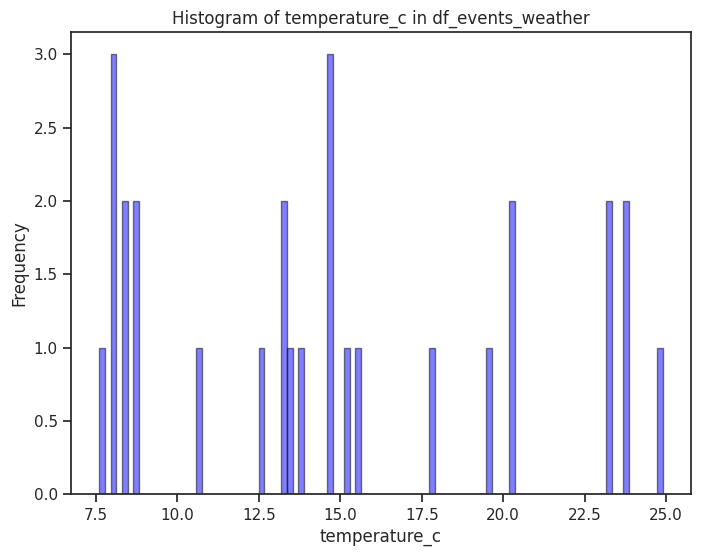

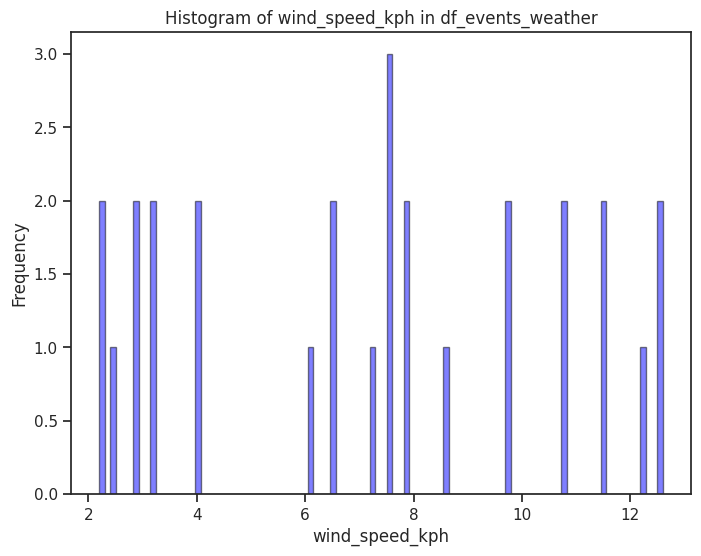

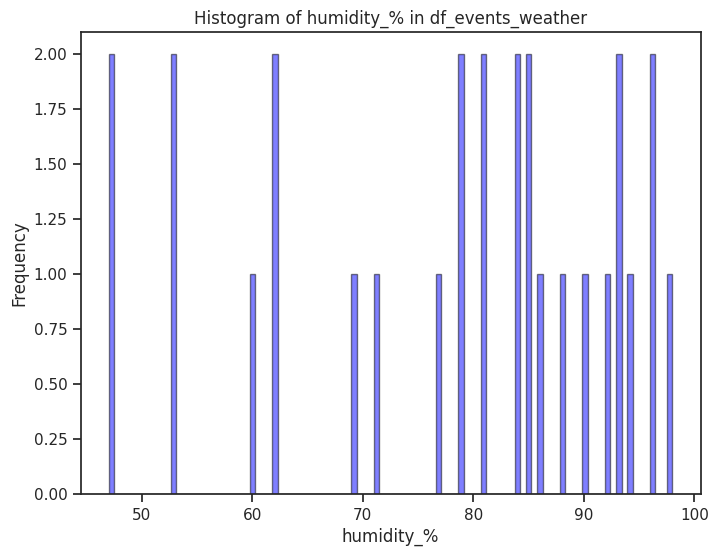

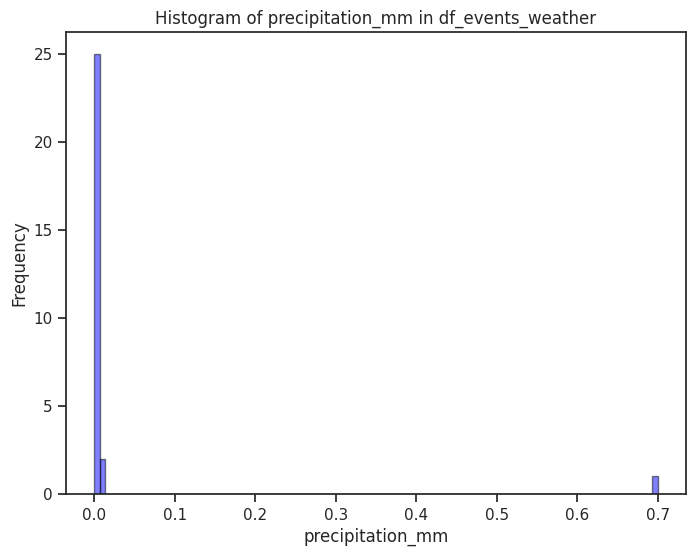

In [158]:
# kicsit √°ttekintem az adatokat
"""
24024
Ebben a k√≥dban a plot_histograms f√ºggv√©nyt defini√°ljuk, amely param√©terk√©nt v√°rja a DataFrame nev√©t (dataframe_name).
A f√ºggv√©ny megpr√≥b√°lja bet√∂lteni a megadott DataFrame-et, √©s ha nem tal√°lja, hib√°t kezel.
Az iter√°ci√≥ √©s hisztogram kirajzol√°s r√©sze ugyanaz maradt. Most p√©lda haszn√°latk√©nt megadhatod a DataFrame nev√©t a plot_histograms f√ºggv√©nyben.
"""

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe_name):
    try:
        # Bet√∂ltj√ºk a DataFrame-et a megadott n√©v alapj√°n
        df = globals()[dataframe_name]

        # Iter√°ci√≥ az oszlopokon √©s hisztogramok kirajzol√°sa egyetlen √°br√°n
        for column in df.columns:
            # Csak numerikus oszlopokat vesz√ºnk figyelembe (elhagyjuk a nem numerikusakat)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Sz√°mold ki a MAX √©s MIN √©rt√©kek k√ºl√∂nbs√©g√©nek 10%-√°t
                bin_width = 0.01 * (df[column].max() - df[column].min())
                # K√©sz√≠ts egyedi √°br√°t minden oszlophoz
                plt.figure(figsize=(8, 6))

                # K√©sz√≠ts hisztogramot a sz√°molt bin-sz√©less√©ggel
                plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / bin_width),
                         color='blue', edgecolor='black', alpha=0.5)

                # √Åbra c√≠me √©s tengelyfeliratai
                plt.title(f'Histogram of {column} in {dataframe_name}')
                plt.xlabel(column)
                plt.ylabel('Frequency')

                # Minden egyes oszlop √°br√°t k√ºl√∂n mutasd be
                plt.show()

    except KeyError:
        print(f"Error: DataFrame with name '{dataframe_name}' not found.")

# P√©lda haszn√°lat:
plot_histograms("df_events_weather")

In [159]:
# itt √≠rn√°m ki eredetileg az id≈ëj√°r√°s √©rt√©keket, mikor m√©g lej√∂ttek az adatok.
# √çr√°s CSV f√°jlba
csv_output_path = "df_events_weather.csv"
df_events_weather.to_csv(csv_output_path, index=False)

# Ellen≈ërz√©s
print(f"DataFrame successfully written to {csv_output_path}.")

DataFrame successfully written to df_events_weather.csv.


#Adat import√°l√°sok, k√©t dataframe egyes√≠t√©s√©hez:

In [160]:
# most bet√∂lt√∂m a versenyek adatb√°zis√°t
# beolvas√°s CSV-b≈ël
import pandas as pd

# DataFrame beolvas√°sa CSV f√°jlb√≥l
df_EFC_CZ_realdate = pd.read_csv("df_EFC_CZ_post_analyzing_merged.csv")

# Az adatok megjelen√≠t√©se
li(df_EFC_CZ_realdate)

haszn√°lat: li(df)  # Haszn√°lja az 'enter' v√°ltoz√≥ √©rt√©k√©t ha l√©tezik √©s nagyobb mint 0, k√ºl√∂nben az √∂sszes sort megjelen√≠ti vagy li(df, -1)


In [161]:
# most bet√∂lt√∂m a versenyek adatb√°zis√°t
# beolvas√°s CSV-b≈ël
import pandas as pd

# DataFrame beolvas√°sa CSV f√°jlb√≥l
df_WRFT = pd.read_csv("df_WRFT_output.csv")

# Az adatok megjelen√≠t√©se
li(df_WRFT)

haszn√°lat: li(df)  # Haszn√°lja az 'enter' v√°ltoz√≥ √©rt√©k√©t ha l√©tezik √©s nagyobb mint 0, k√ºl√∂nben az √∂sszes sort megjelen√≠ti vagy li(df, -1)


In [162]:
# elk√©sz√≠tem az √∫j oszlopkat az id≈ëj√°r√°snak
from unidecode import unidecode

def add_weather_columns(df):
    # Csak a z√°r√≥jelen bel√ºli r√©sz kiv√°laszt√°sa √©s az angolos√≠t√°s
    df['Location_English'] = df['event_place'].str.extract(r'\((.*?)\)', expand=False).apply(lambda x: unidecode(x) if x else '')

    # √öj oszlopok l√©trehoz√°sa √©s felt√∂lt√©se NaN √©rt√©kekkel
    df['temperature_c'] = float('nan')
    df['wind_speed_kph'] = float('nan')
    df['humidity_%'] = float('nan')
    df['precipitation_mm'] = float('nan')
    return df

# DataFrame kieg√©sz√≠t√©se √∫j oszlopokkal
df_EFC_CZ_weather = add_weather_columns(df_EFC_CZ_realdate)
li(df_EFC_CZ_weather)

haszn√°lat: li(df)  # Haszn√°lja az 'enter' v√°ltoz√≥ √©rt√©k√©t ha l√©tezik √©s nagyobb mint 0, k√ºl√∂nben az √∂sszes sort megjelen√≠ti vagy li(df, -1)


In [163]:
df_EFC_CZ_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sorsz               7640 non-null   int64  
 1   division            7640 non-null   float64
 2   when                7640 non-null   object 
 3   who                 7640 non-null   object 
 4   with_who            7640 non-null   object 
 5   total_time          7640 non-null   float64
 6   W/L/T               7640 non-null   object 
 7   hurdles             7640 non-null   float64
 8   name                7640 non-null   object 
 9   start               7640 non-null   float64
 10  1_dog               7640 non-null   float64
 11  name_1              7640 non-null   object 
 12  chng                7640 non-null   float64
 13  2_dog               7640 non-null   float64
 14  name_2              7640 non-null   object 
 15  chng_1              7640 non-null   float64
 16  3_dog 

In [164]:
# beolvas√°s CSV-b≈ël
import pandas as pd

# DataFrame beolvas√°sa CSV f√°jlb√≥l
df_events_weather = pd.read_csv("df_events_weather.csv")

# Az adatok megjelen√≠t√©se
li(df_events_weather)

haszn√°lat: li(df)  # Haszn√°lja az 'enter' v√°ltoz√≥ √©rt√©k√©t ha l√©tezik √©s nagyobb mint 0, k√ºl√∂nben az √∂sszes sort megjelen√≠ti vagy li(df, -1)


In [165]:
dinfo(df_events_weather)



DataFrame oszlopainak statisztik√°i:


In [166]:
# az id≈ëj√°r√°s adatok hozz√°ad√°sa a versenyadatokhoz
def update_weather_data(df_events_weather, df_EFC_CZ_weather):
    for index, row in df_EFC_CZ_weather.iterrows():
        location = row['Location_English']
        date = row['when_date']
        # Keresd meg az id≈ëj√°r√°si adatokat az esem√©nyhez tartoz√≥ d√°tum √©s helysz√≠n alapj√°n
        weather_data = df_events_weather[(df_events_weather['Location_English'] == location) & (df_events_weather['ISO_Date'] == date)]
        #print(location,date,weather_data)
        if not weather_data.empty:
            # Friss√≠tsd az id≈ëj√°r√°si adatokat a megfelel≈ë oszlopokban
            df_EFC_CZ_weather.at[index, 'temperature_c'] = weather_data.iloc[0]['temperature_c']
            df_EFC_CZ_weather.at[index, 'wind_speed_kph'] = weather_data.iloc[0]['wind_speed_kph']
            df_EFC_CZ_weather.at[index, 'humidity_%'] = weather_data.iloc[0]['humidity_%']
            df_EFC_CZ_weather.at[index, 'precipitation_mm'] = weather_data.iloc[0]['precipitation_mm']
    return df_EFC_CZ_weather

# Megh√≠v√°s:
df_EFC_CZ_weather = update_weather_data(df_events_weather, df_EFC_CZ_weather)


In [167]:
# el is k√©sz√ºlt
li(df_EFC_CZ_weather)

haszn√°lat: li(df)  # Haszn√°lja az 'enter' v√°ltoz√≥ √©rt√©k√©t ha l√©tezik √©s nagyobb mint 0, k√ºl√∂nben az √∂sszes sort megjelen√≠ti vagy li(df, -1)


In [168]:
df_EFC_CZ_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sorsz               7640 non-null   int64  
 1   division            7640 non-null   float64
 2   when                7640 non-null   object 
 3   who                 7640 non-null   object 
 4   with_who            7640 non-null   object 
 5   total_time          7640 non-null   float64
 6   W/L/T               7640 non-null   object 
 7   hurdles             7640 non-null   float64
 8   name                7640 non-null   object 
 9   start               7640 non-null   float64
 10  1_dog               7640 non-null   float64
 11  name_1              7640 non-null   object 
 12  chng                7640 non-null   float64
 13  2_dog               7640 non-null   float64
 14  name_2              7640 non-null   object 
 15  chng_1              7640 non-null   float64
 16  3_dog 

In [169]:
dinfo(df_EFC_CZ_weather)


DataFrame oszlopainak statisztik√°i:


In [170]:
df=df_EFC_CZ_weather

In [171]:
import pandas as pd

# Wildrunners csapat tagjainak nev√©nek lek√©rdez√©se
wildrunners_names = df[df['who'].str.contains('Wildrunners', case=False)]['name']

print(wildrunners_names)

1          Brix
3          Brix
5          Brix
7          Brix
9          Brix
75         Brix
77         Brix
79         Brix
82         Brix
154        Brix
156        Brix
158        Brix
         ...   
7566     Maggie
7568     Maggie
7570     Maggie
7572       Nina
7574       Nina
7576       Nina
7599    Cookies
7601    Cookies
7603    Cookies
7621       Nina
7623       Nina
7626       Nina
Name: name, Length: 1026, dtype: object


In [172]:
wildrunners_names


1          Brix
3          Brix
5          Brix
7          Brix
9          Brix
75         Brix
77         Brix
79         Brix
82         Brix
154        Brix
156        Brix
158        Brix
         ...   
7566     Maggie
7568     Maggie
7570     Maggie
7572       Nina
7574       Nina
7576       Nina
7599    Cookies
7601    Cookies
7603    Cookies
7621       Nina
7623       Nina
7626       Nina
Name: name, Length: 1026, dtype: object

In [173]:
import pandas as pd

# Filtering Wildrunners team members
wildrunners_data = df[df['who'].str.contains('Wildrunners', case=False)]

# Selecting unique names directly from the filtered DataFrame
unique_names = wildrunners_data['name'].unique()

print(unique_names)

['Brix' 'Brooke' 'Sunny' 'Enola' 'Cookies' 'Dusty' 'Falco' 'Negro'
 'Sirius' 'Bailey' 'Fleur' 'Dixie' 'Rocky' 'Dexter' 'Mason' 'Nina' 'Angie'
 'Bonnie' 'Riley' 'Gerry' 'Bree' 'Jessie' 'Jasper' 'Scotty' 'Hank' 'Rex'
 'Alex' 'Pax' 'Gordon' 'Easy' 'Kent' 'Maggie']


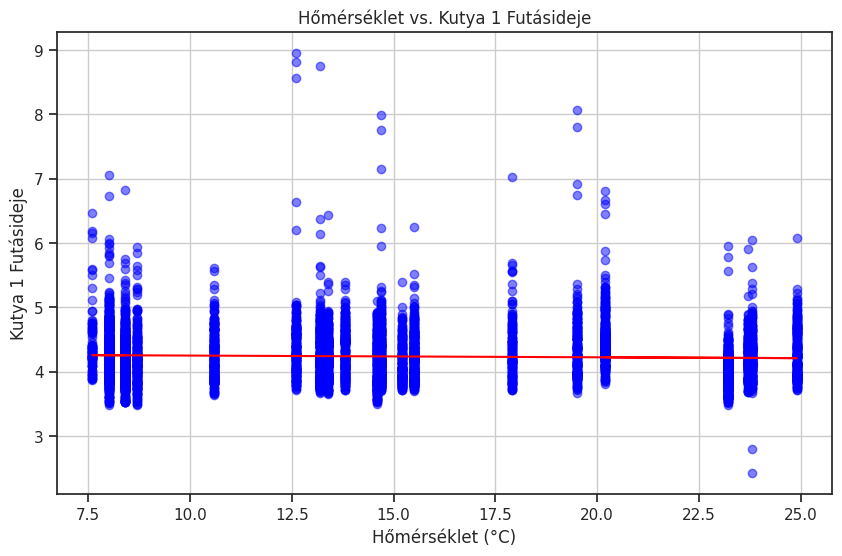

In [174]:

import matplotlib.pyplot as plt

# Adatok beolvas√°sa √©s feldolgoz√°sa (p√©ldaadatk√©nt a h≈ëm√©rs√©klet √©s az 1. kutya futamideje)
temperature = df_EFC_CZ_weather["temperature_c"]
dog1_time = df_EFC_CZ_realdate["1_dog"]

# Grafikon l√©trehoz√°sa
plt.figure(figsize=(10, 6))
plt.scatter(temperature, dog1_time, color='blue', alpha=0.5)  # H≈ëm√©rs√©klet √©s kutya futamid≈ë scatter plot
plt.title('H≈ëm√©rs√©klet vs. Kutya 1 Fut√°sideje')
plt.xlabel('H≈ëm√©rs√©klet (¬∞C)')
plt.ylabel('Kutya 1 Fut√°sideje')

# Egyenes illeszt√©se
z = np.polyfit(temperature, dog1_time, 1)
p = np.poly1d(z)
plt.plot(temperature, p(temperature), color='red')

plt.grid(True)
plt.show()

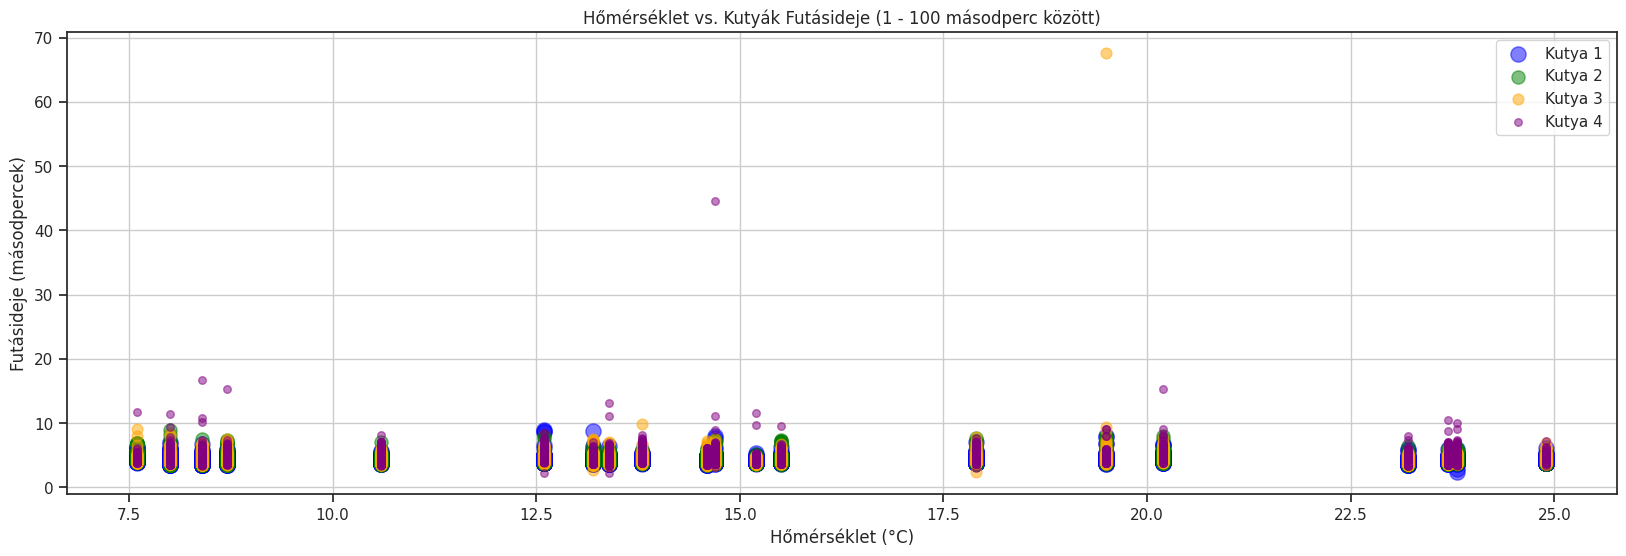

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvas√°sa
temperature = df_EFC_CZ_weather["temperature_c"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Sz≈±r√©si felt√©telek alkalmaz√°sa minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon l√©trehoz√°sa
plt.figure(figsize=(20, 6))

# Sz≈±rt adatok megjelen√≠t√©se k√ºl√∂nb√∂z≈ë m√©ret≈± p√∂tty√∂kkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('H≈ëm√©rs√©klet vs. Kuty√°k Fut√°sideje (1 - 100 m√°sodperc k√∂z√∂tt)')
plt.xlabel('H≈ëm√©rs√©klet (¬∞C)')
plt.ylabel('Fut√°sideje (m√°sodpercek)')
plt.legend()


# Egyenes illeszt√©se a sz≈±rt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


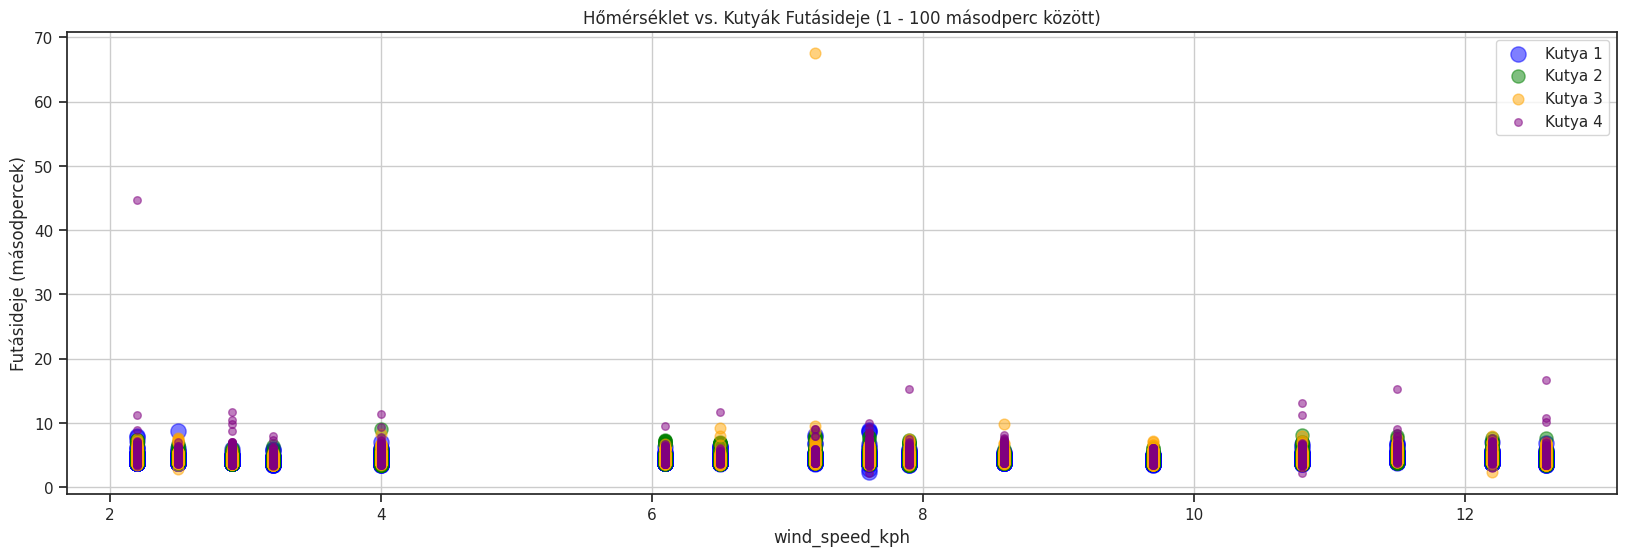

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvas√°sa
temperature = df_EFC_CZ_weather["wind_speed_kph"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Sz≈±r√©si felt√©telek alkalmaz√°sa minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon l√©trehoz√°sa
plt.figure(figsize=(20, 6))

# Sz≈±rt adatok megjelen√≠t√©se k√ºl√∂nb√∂z≈ë m√©ret≈± p√∂tty√∂kkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('H≈ëm√©rs√©klet vs. Kuty√°k Fut√°sideje (1 - 100 m√°sodperc k√∂z√∂tt)')
plt.xlabel('wind_speed_kph')
plt.ylabel('Fut√°sideje (m√°sodpercek)')
plt.legend()


# Egyenes illeszt√©se a sz≈±rt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


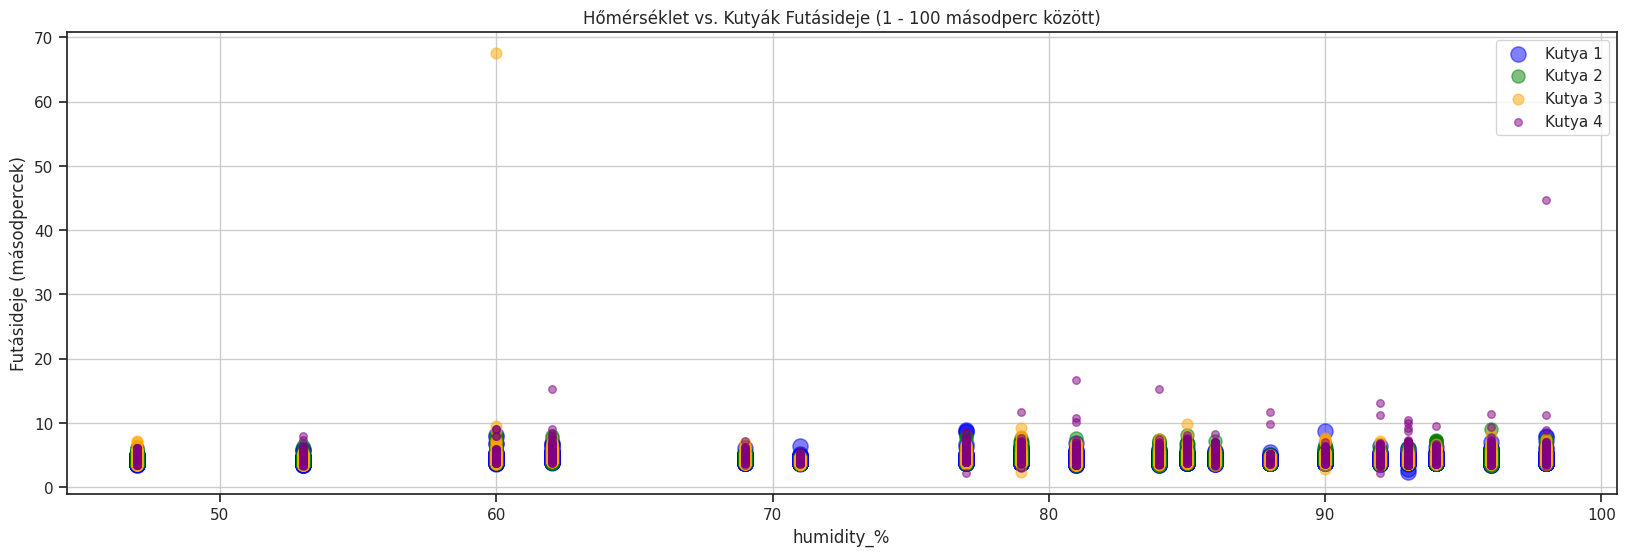

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvas√°sa
temperature = df_EFC_CZ_weather["humidity_%"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Sz≈±r√©si felt√©telek alkalmaz√°sa minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon l√©trehoz√°sa
plt.figure(figsize=(20, 6))

# Sz≈±rt adatok megjelen√≠t√©se k√ºl√∂nb√∂z≈ë m√©ret≈± p√∂tty√∂kkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('H≈ëm√©rs√©klet vs. Kuty√°k Fut√°sideje (1 - 100 m√°sodperc k√∂z√∂tt)')
plt.xlabel('humidity_%')
plt.ylabel('Fut√°sideje (m√°sodpercek)')
plt.legend()


# Egyenes illeszt√©se a sz≈±rt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


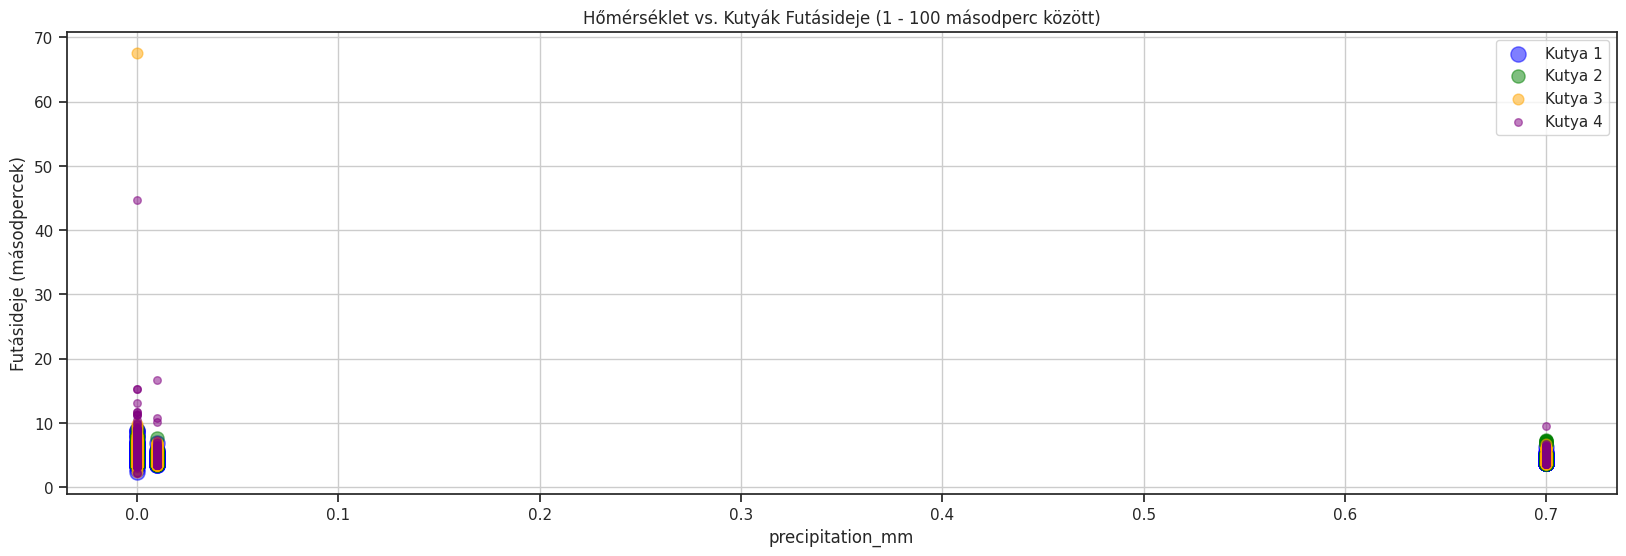

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvas√°sa
temperature = df_EFC_CZ_weather["precipitation_mm"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Sz≈±r√©si felt√©telek alkalmaz√°sa minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon l√©trehoz√°sa
plt.figure(figsize=(20, 6))

# Sz≈±rt adatok megjelen√≠t√©se k√ºl√∂nb√∂z≈ë m√©ret≈± p√∂tty√∂kkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('H≈ëm√©rs√©klet vs. Kuty√°k Fut√°sideje (1 - 100 m√°sodperc k√∂z√∂tt)')
plt.xlabel('precipitation_mm')
plt.ylabel('Fut√°sideje (m√°sodpercek)')
plt.legend()


# Egyenes illeszt√©se a sz≈±rt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


###Szerintem a grafikonokb√≥l j√≥l l√°that√≥, hogy az id≈ëj√°r√°si k√∂r√ºlm√©nyek ezeken a versenyeken nem jelent≈ësen befoly√°solt√°k az eredm√©nyeket.

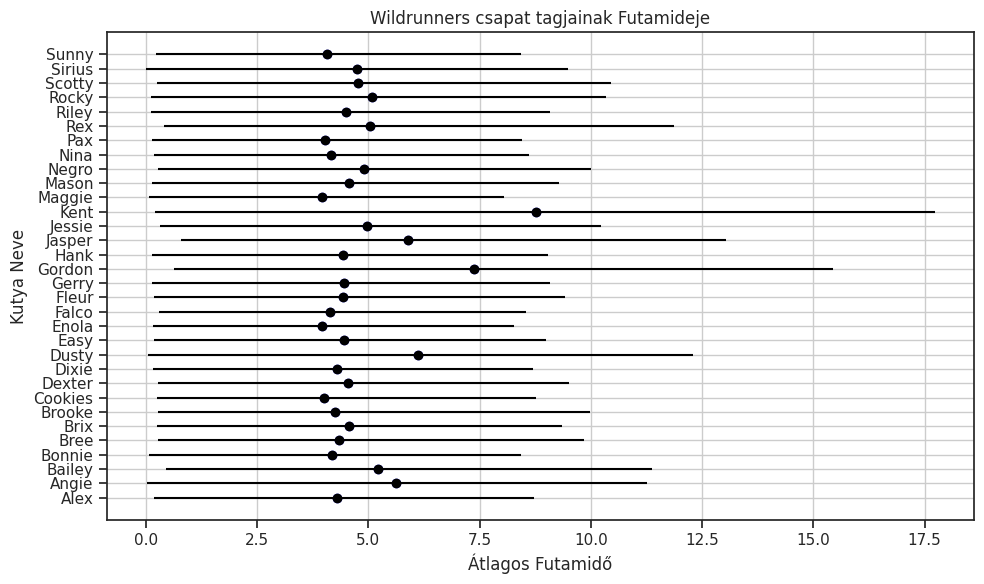

In [179]:
import matplotlib.pyplot as plt

# Wildrunners csapat tagjainak legjobb, legrosszabb √©s √°tlagos futamideje
wildrunners_data = df[df['who'].str.contains('Wildrunners', case=False)]
aggregated_data = wildrunners_data.groupby('name')[ '1_dog'].agg(['min', 'max', 'mean']).reset_index()

# Grafikon l√©trehoz√°sa
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['mean'], aggregated_data['name'], color='blue', alpha=0.7)  # √Åtlagos futamid≈ë √©s n√©v scatter plot
plt.errorbar(aggregated_data['mean'], aggregated_data['name'], xerr=[aggregated_data['min'], aggregated_data['max']], fmt='o', color='black')  # Hibaoszlopok hozz√°ad√°sa
plt.title('Wildrunners csapat tagjainak Futamideje')
plt.xlabel('√Åtlagos Futamid≈ë')
plt.ylabel('Kutya Neve')
plt.grid(True)
plt.tight_layout()

plt.show()

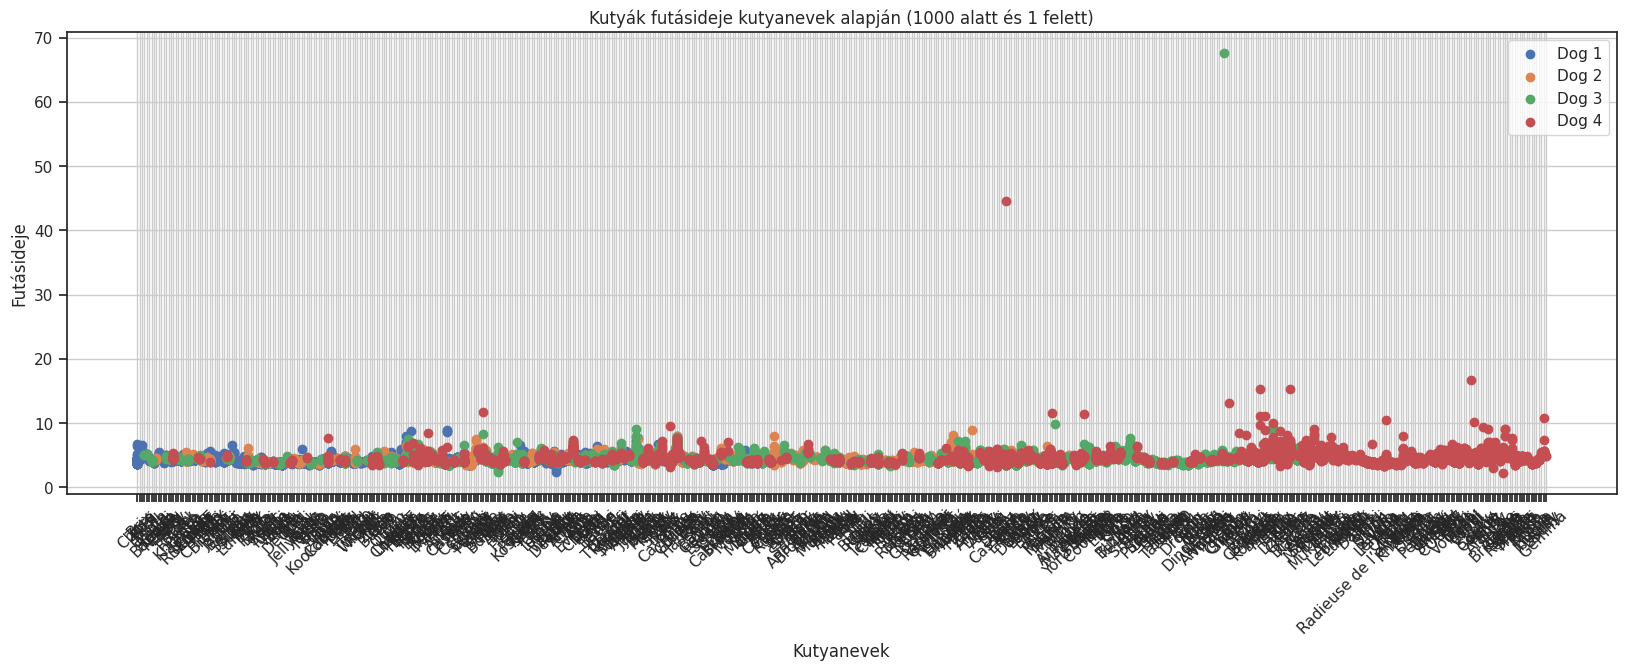

In [180]:
import matplotlib.pyplot as plt

# Kutyanevek √©s fut√°sidejek kiv√°laszt√°sa az 1000 alatti √©s 1 feletti √©rt√©kekkel
df_filtered = df_EFC_CZ_weather[(df_EFC_CZ_weather['1_dog'] < 1000) &
                                 (df_EFC_CZ_weather['1_dog'] > 1) &
                                 (df_EFC_CZ_weather['2_dog'] < 1000) &
                                 (df_EFC_CZ_weather['2_dog'] > 1) &
                                 (df_EFC_CZ_weather['3_dog'] < 1000) &
                                 (df_EFC_CZ_weather['3_dog'] > 1) &
                                 (df_EFC_CZ_weather['4_dog'] < 1000) &
                                 (df_EFC_CZ_weather['4_dog'] > 1)]

kutyanevek = df_filtered[['name', 'name_1', 'name_2', 'name_3']]
futasidejek = df_filtered[['1_dog', '2_dog', '3_dog', '4_dog']]

# Pontgrafikon l√©trehoz√°sa
plt.figure(figsize=(20, 6))

# Pontok √°br√°zol√°sa a kutyanevek alapj√°n
for i in range(len(kutyanevek.columns)):
    plt.scatter(kutyanevek.iloc[:, i], futasidejek.iloc[:, i], label=f'Dog {i+1}')

plt.xlabel('Kutyanevek')
plt.ylabel('Fut√°sideje')
plt.title('Kuty√°k fut√°sideje kutyanevek alapj√°n (1000 alatt √©s 1 felett)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


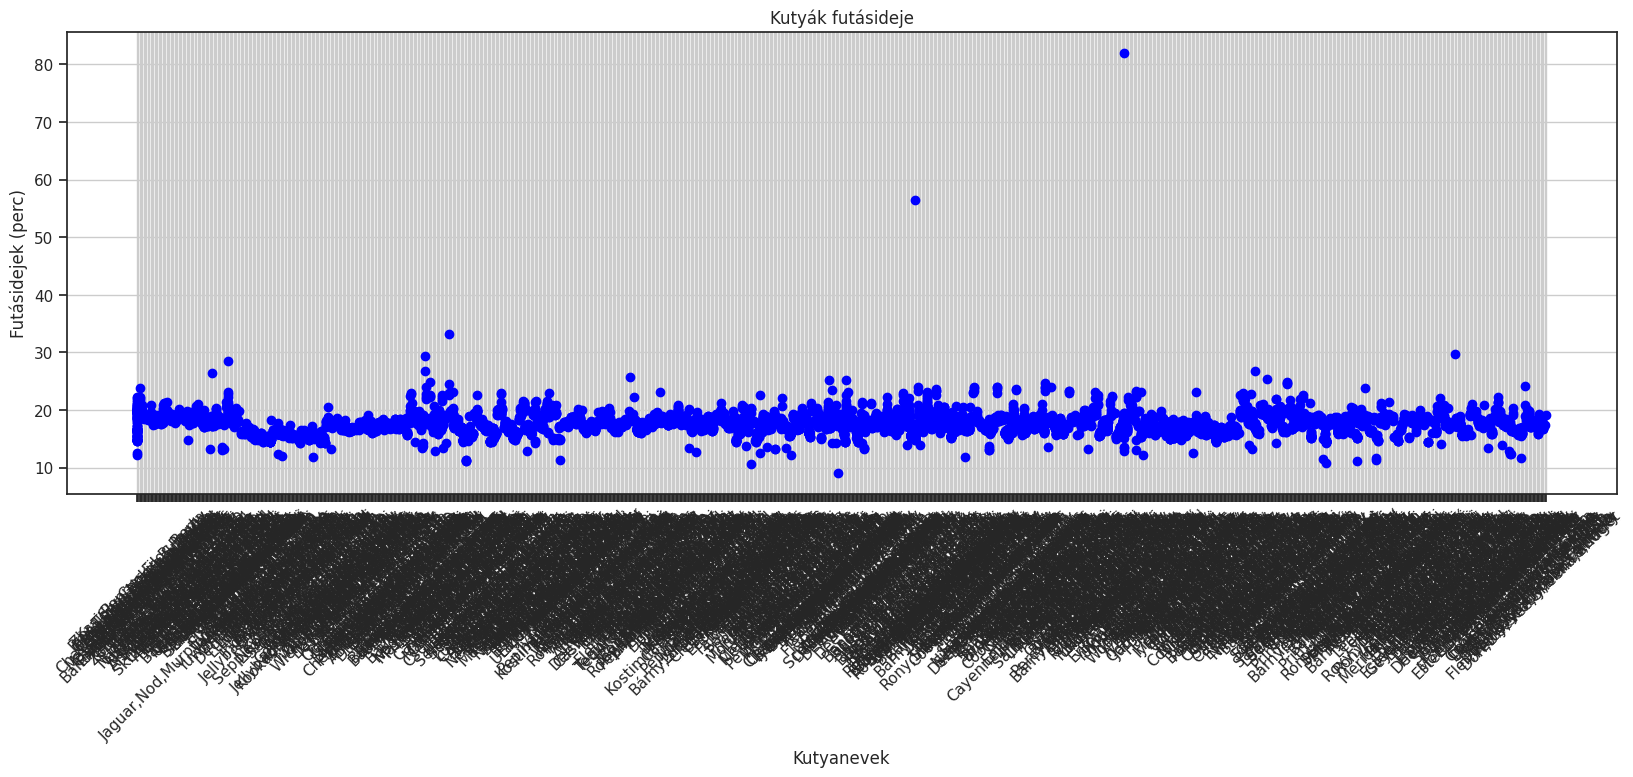

In [181]:
# 'NAME' √©s 'DOG' oszlopok l√©trehoz√°sa
# Egyedi √©rt√©kek kiv√°logat√°sa √©s √∂sszekapcsol√°sa vessz≈ëvel
df['NAME'] = df[['name', 'name_1', 'name_2', 'name_3']].apply(lambda x: ','.join(x.drop_duplicates()), axis=1)
df['DOG'] = df[['1_dog', '2_dog', '3_dog', '4_dog']].sum(axis=1)

# Csak az 800 alatti √©s 1 feletti √©rt√©kek kiv√°logat√°sa
filtered_dog_values = df[['1_dog', '2_dog', '3_dog', '4_dog']].apply(lambda x: x[(x > 1) & (x < 800)], axis=1)

# 'DOG' oszlop l√©trehoz√°sa az √∫j sz≈±rt √©rt√©kekkel
df['DOG'] = filtered_dog_values.sum(axis=1)


# Pontgrafikon l√©trehoz√°sa
plt.figure(figsize=(20, 6))
plt.scatter(df['NAME'], df['DOG'], color='blue')
plt.xlabel('Kutyanevek')
plt.ylabel('Fut√°sidejek (perc)')
plt.title('Kuty√°k fut√°sideje')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


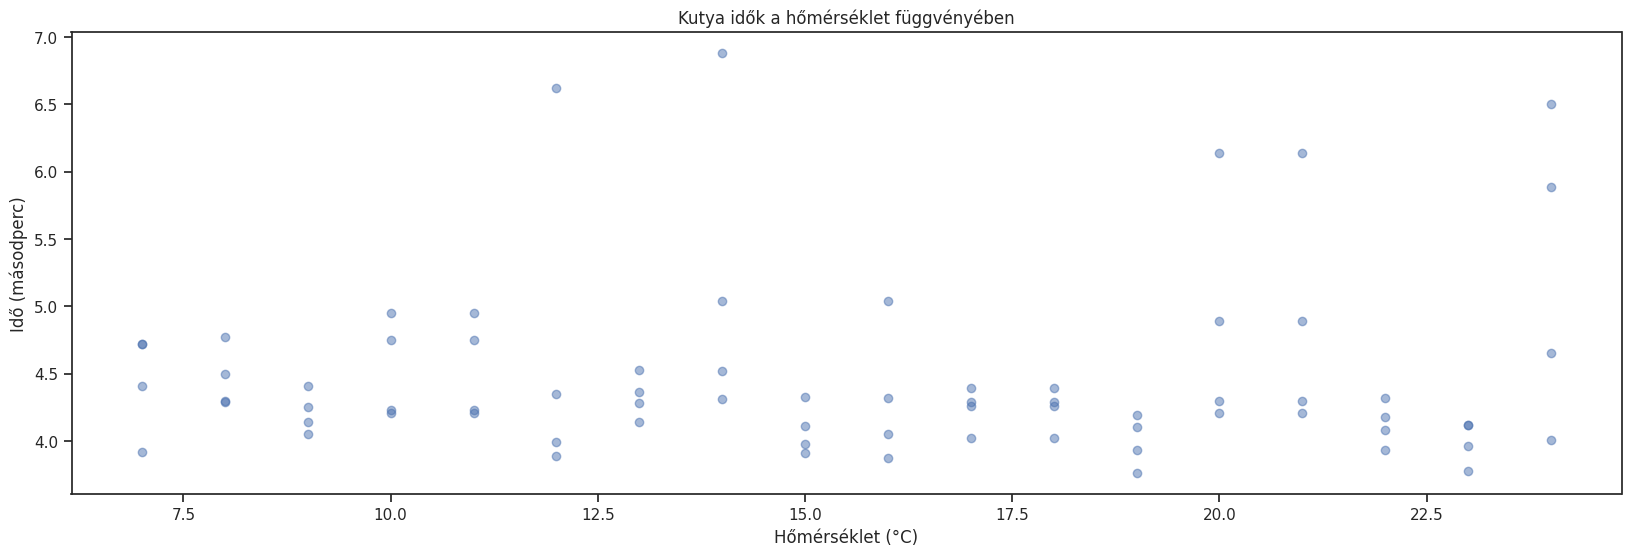

In [182]:
import matplotlib.pyplot as plt

# H≈ëm√©rs√©klet tartom√°ny l√©trehoz√°sa
temperature_range = range(int(df_EFC_CZ_weather['temperature_c'].min()), int(df_EFC_CZ_weather['temperature_c'].max()) + 1)

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Minden egyes h≈ëm√©rs√©klet√©rt√©khez 1 fokonk√©nt csin√°lunk iter√°ci√≥t
for temp in temperature_range:
    # Legk√∂zelebbi h≈ëm√©rs√©klet megtal√°l√°sa az adott √©rt√©khez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['temperature_c'] - temp).abs().argsort()[:1]]
    # Az adott h≈ëm√©rs√©kleten m√©rt kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok √°br√°zol√°sa
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('H≈ëm√©rs√©klet (¬∞C)')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a h≈ëm√©rs√©klet f√ºggv√©ny√©ben')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()



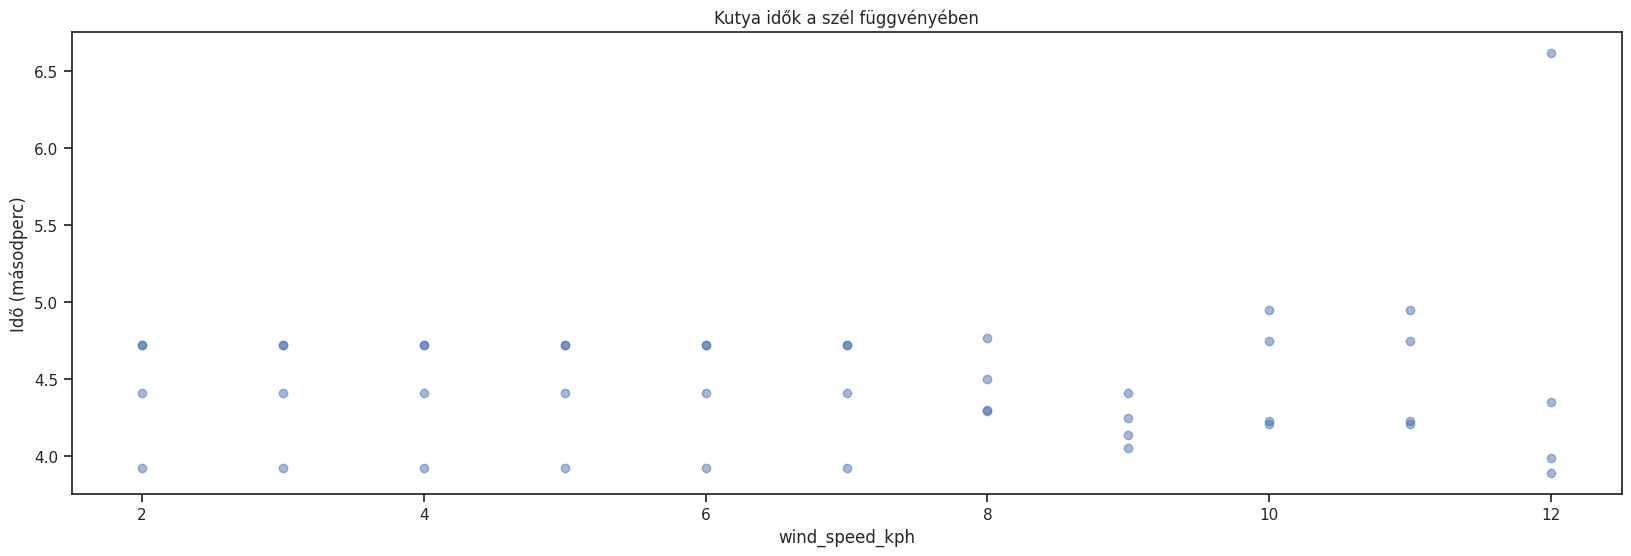

In [183]:
import matplotlib.pyplot as plt

# H≈ëm√©rs√©klet tartom√°ny l√©trehoz√°sa
temperature_range = range(int(df_EFC_CZ_weather['wind_speed_kph'].min()), int(df_EFC_CZ_weather['wind_speed_kph'].max()) + 1)

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Minden egyes h≈ëm√©rs√©klet√©rt√©khez 1 fokonk√©nt csin√°lunk iter√°ci√≥t
for temp in temperature_range:
    # Legk√∂zelebbi h≈ëm√©rs√©klet megtal√°l√°sa az adott √©rt√©khez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['temperature_c'] - temp).abs().argsort()[:1]]
    # Az adott h≈ëm√©rs√©kleten m√©rt kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok √°br√°zol√°sa
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('wind_speed_kph')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a sz√©l f√ºggv√©ny√©ben')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()

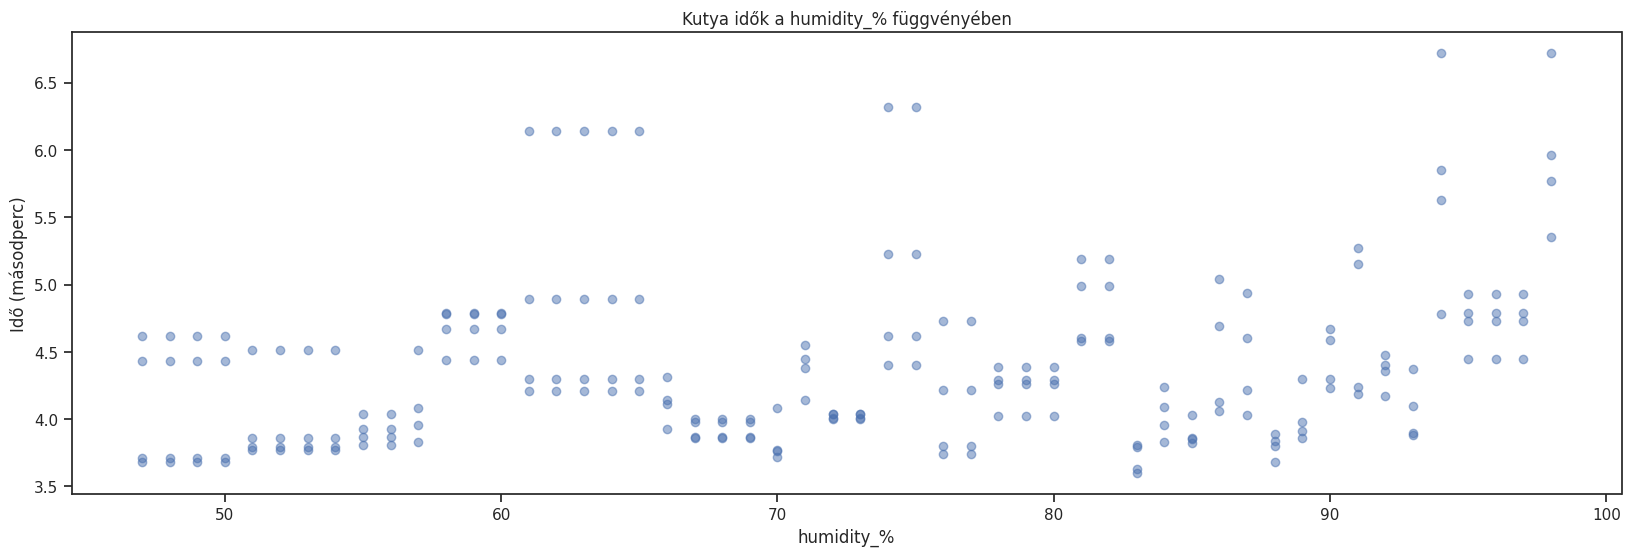

In [184]:
import matplotlib.pyplot as plt

# H≈ëm√©rs√©klet tartom√°ny l√©trehoz√°sa
temperature_range = range(int(df_EFC_CZ_weather['humidity_%'].min()), int(df_EFC_CZ_weather['humidity_%'].max()) + 1)

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Minden egyes h≈ëm√©rs√©klet√©rt√©khez 1 fokonk√©nt csin√°lunk iter√°ci√≥t
for temp in temperature_range:
    # Legk√∂zelebbi h≈ëm√©rs√©klet megtal√°l√°sa az adott √©rt√©khez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['humidity_%'] - temp).abs().argsort()[:1]]
    # Az adott h≈ëm√©rs√©kleten m√©rt kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok √°br√°zol√°sa
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('humidity_%')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a humidity_% f√ºggv√©ny√©ben')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()

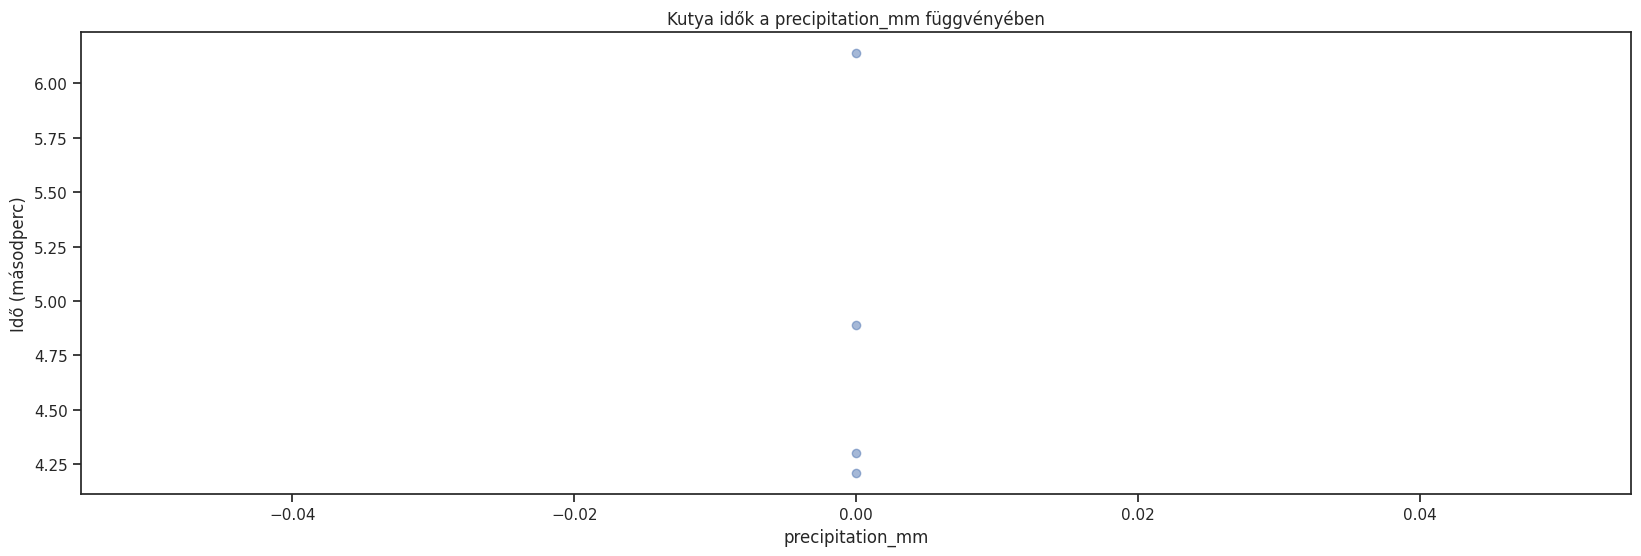

In [185]:
import matplotlib.pyplot as plt

# H≈ëm√©rs√©klet tartom√°ny l√©trehoz√°sa
temperature_range = range(int(df_EFC_CZ_weather['precipitation_mm'].min()), int(df_EFC_CZ_weather['precipitation_mm'].max()) + 1)

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Minden egyes h≈ëm√©rs√©klet√©rt√©khez 1 fokonk√©nt csin√°lunk iter√°ci√≥t
for temp in temperature_range:
    # Legk√∂zelebbi h≈ëm√©rs√©klet megtal√°l√°sa az adott √©rt√©khez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['precipitation_mm'] - temp).abs().argsort()[:1]]
    # Az adott h≈ëm√©rs√©kleten m√©rt kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok √°br√°zol√°sa
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('precipitation_mm')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a precipitation_mm f√ºggv√©ny√©ben')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()

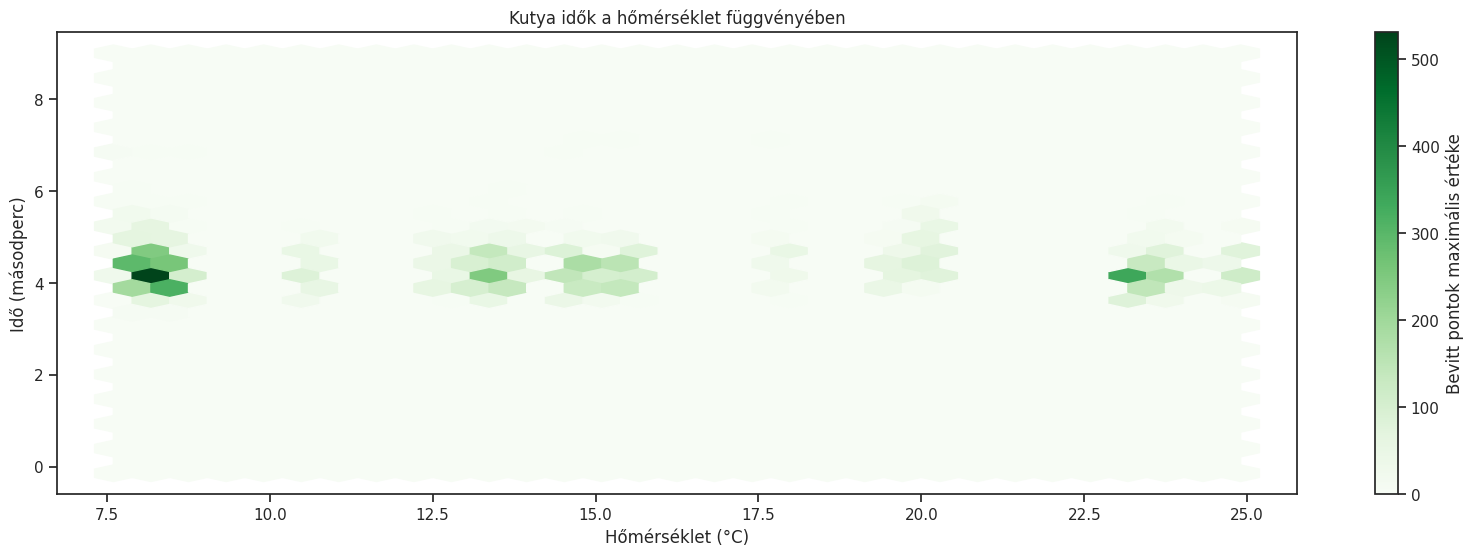

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Tiszt√≠tjuk az adatokat, csak sz√°mokat tartalmaz√≥ oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['temperature_c', '1_dog', '2_dog','3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Hexbin √°br√°zol√°s a kutyaidejekkel √©s a h≈ëm√©rs√©klettel
plt.hexbin(df_EFC_CZ_weather_cleaned['temperature_c'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Greens', reduce_C_function=max)


# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('H≈ëm√©rs√©klet (¬∞C)')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a h≈ëm√©rs√©klet f√ºggv√©ny√©ben')

# Sz√≠nmagyar√°zat hozz√°ad√°sa
plt.colorbar(label='Bevitt pontok maxim√°lis √©rt√©ke')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()


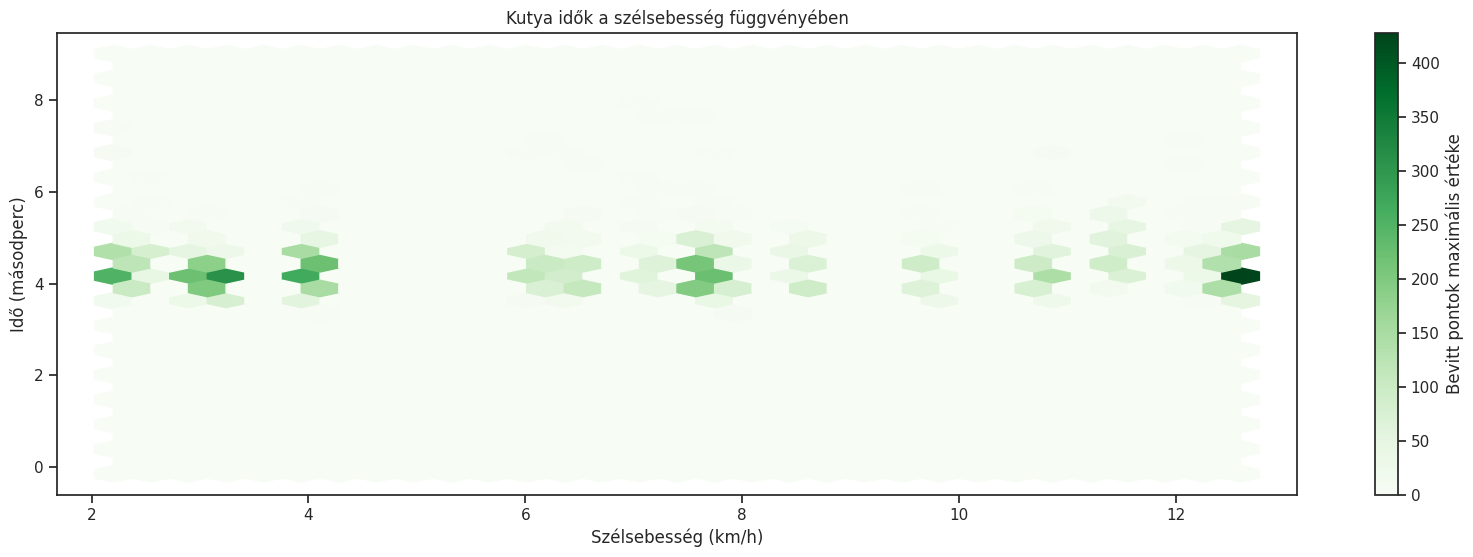

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# A felt√©telez√©s, hogy a 'df_EFC_CZ_weather' DataFrame m√°r tartalmazza a 'wind_speed_kph' oszlopot.
# Adatok tiszt√≠t√°sa, csak sz√°mokat tartalmaz√≥ oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['wind_speed_kph', '1_dog', '2_dog', '3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Hexbin √°br√°zol√°s a m√°sodik kutya idej√©vel √©s a sz√©lsebess√©ggel
plt.hexbin(df_EFC_CZ_weather_cleaned['wind_speed_kph'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Greens', reduce_C_function=max)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('Sz√©lsebess√©g (km/h)')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a sz√©lsebess√©g f√ºggv√©ny√©ben')

# Sz√≠nmagyar√°zat hozz√°ad√°sa
plt.colorbar(label='Bevitt pontok maxim√°lis √©rt√©ke')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()



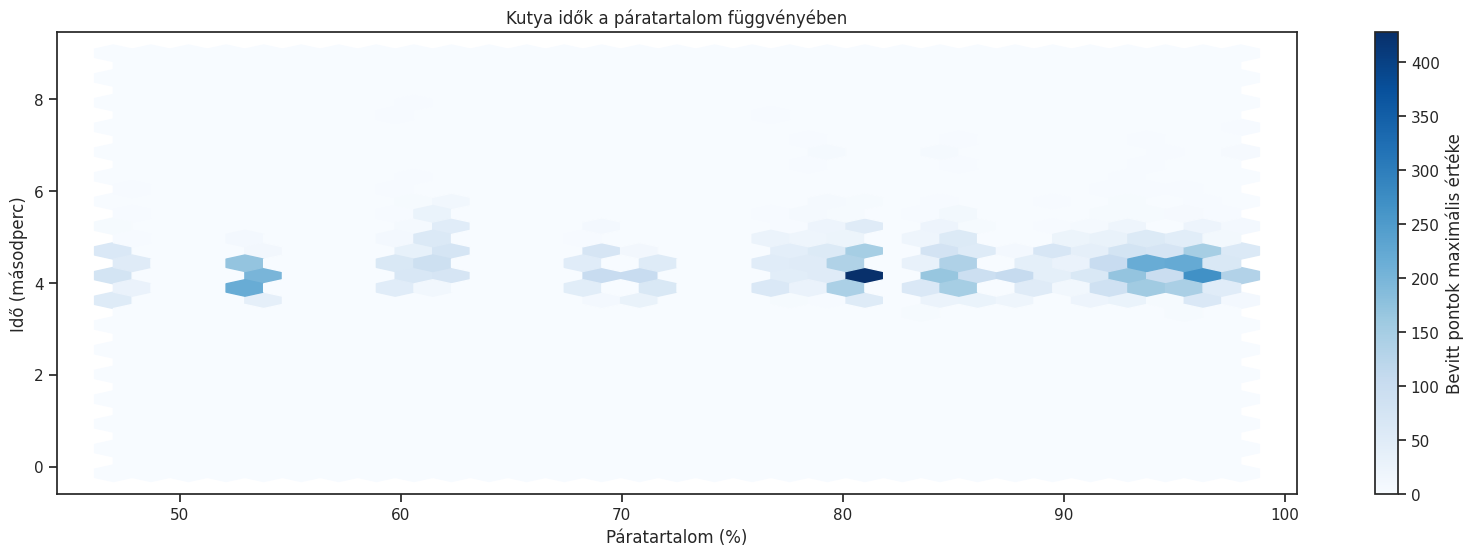

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Felt√©telezve, hogy a 'df_EFC_CZ_weather' DataFrame tartalmaz egy 'humidity_%' oszlopot.
# Adatok tiszt√≠t√°sa, csak sz√°mokat tartalmaz√≥ oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['humidity_%', '1_dog', '2_dog', '3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Hexbin √°br√°zol√°s a m√°sodik kutya idej√©vel √©s a p√°ratartalommal
plt.hexbin(df_EFC_CZ_weather_cleaned['humidity_%'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Blues', reduce_C_function=max)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('P√°ratartalom (%)')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a p√°ratartalom f√ºggv√©ny√©ben')

# Sz√≠nmagyar√°zat hozz√°ad√°sa
plt.colorbar(label='Bevitt pontok maxim√°lis √©rt√©ke')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()


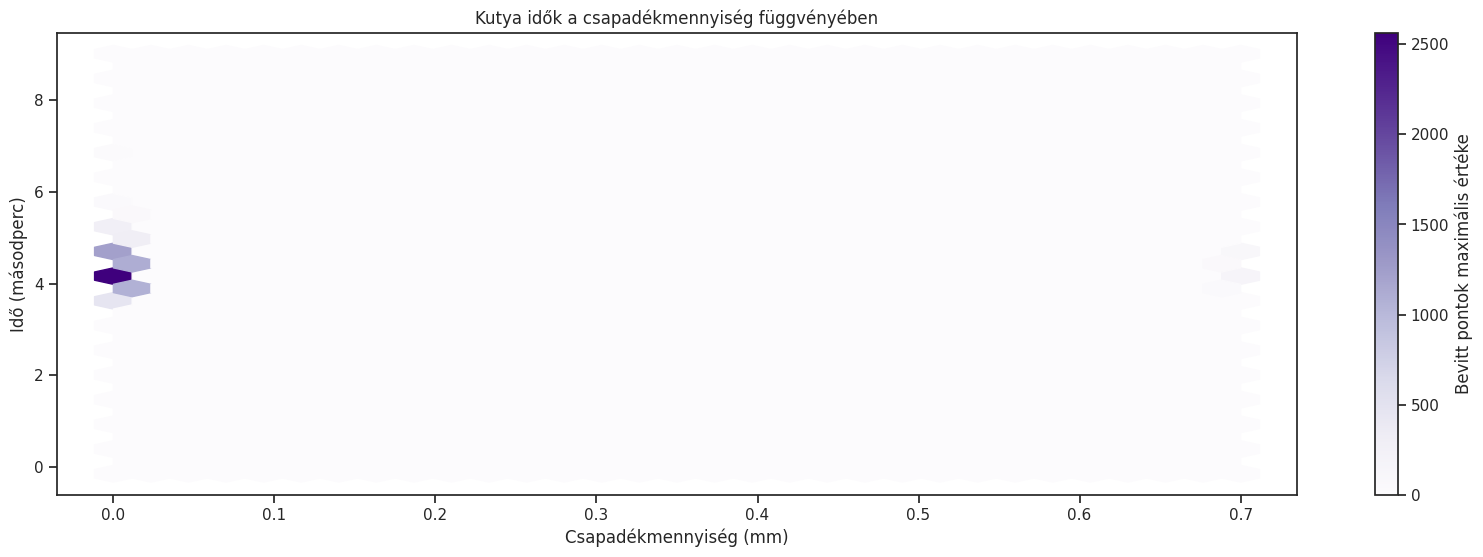

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# A 'df_EFC_CZ_weather' DataFrame-b≈ël kiindulva, felt√©telezz√ºk, hogy tartalmaz egy 'precipitation_mm' oszlopot.
# Adatok tiszt√≠t√°sa, csak sz√°mokat tartalmaz√≥ oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['precipitation_mm', '1_dog', '2_dog', '3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# √Åbr√°zol√°s
plt.figure(figsize=(20, 6))

# Hexbin √°br√°zol√°s a m√°sodik kutya idej√©vel √©s a csapad√©kmennyis√©ggel
plt.hexbin(df_EFC_CZ_weather_cleaned['precipitation_mm'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Purples', reduce_C_function=max)

# Tengelyek √©s c√≠m be√°ll√≠t√°sa
plt.xlabel('Csapad√©kmennyis√©g (mm)')
plt.ylabel('Id≈ë (m√°sodperc)')
plt.title('Kutya id≈ëk a csapad√©kmennyis√©g f√ºggv√©ny√©ben')

# Sz√≠nmagyar√°zat hozz√°ad√°sa
plt.colorbar(label='Bevitt pontok maxim√°lis √©rt√©ke')

# √Åbr√°zol√°s megjelen√≠t√©se
plt.show()


In [190]:
# √çr√°s CSV f√°jlba
csv_output_path = "df_EFC_CZ_Weather.csv"
df_EFC_CZ_weather.to_csv(csv_output_path, index=False)

# Ellen≈ërz√©s
print(f"DataFrame successfully written to {csv_output_path}.")


DataFrame successfully written to df_EFC_CZ_Weather.csv.


## Innent≈ël m√°r csak visszaellen≈ërz√©s

In [191]:
import pandas as pd

# DataFrame beolvas√°sa CSV f√°jlb√≥l
df_EFC_CZ_weather_output = pd.read_csv("df_EFC_CZ_Weather.csv")

# Az adatok megjelen√≠t√©se
li(df_EFC_CZ_weather_output)

haszn√°lat: li(df)  # Haszn√°lja az 'enter' v√°ltoz√≥ √©rt√©k√©t ha l√©tezik √©s nagyobb mint 0, k√ºl√∂nben az √∂sszes sort megjelen√≠ti vagy li(df, -1)


In [192]:
dinfo(df_EFC_CZ_weather_output)


DataFrame oszlopainak statisztik√°i:


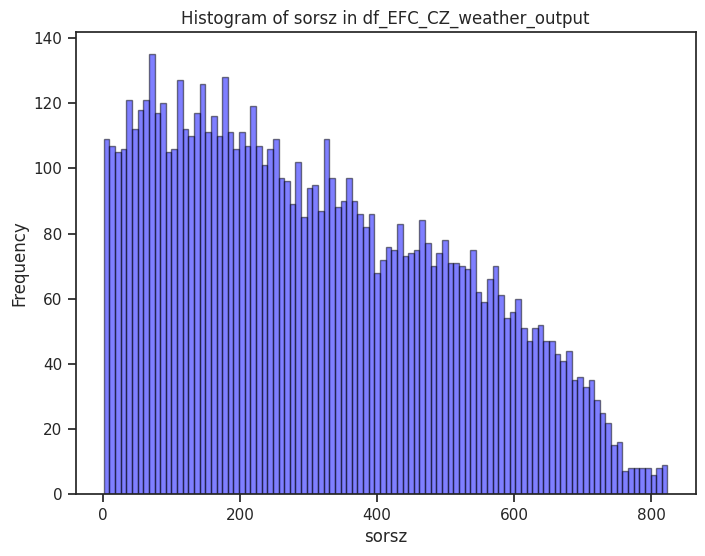

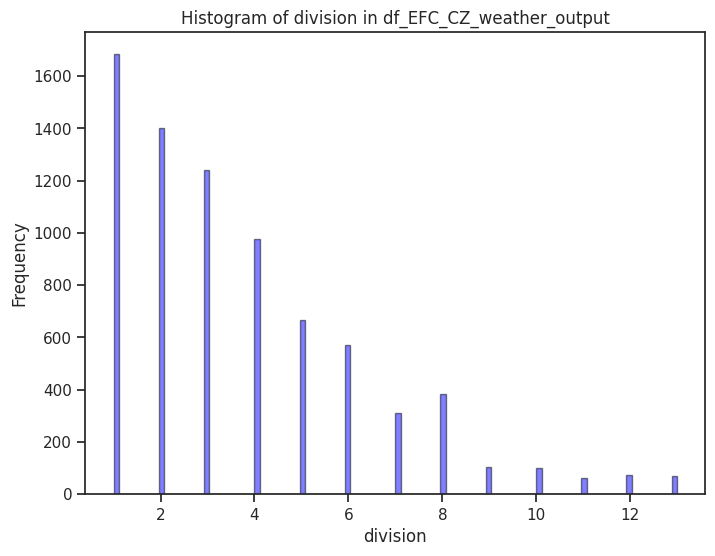

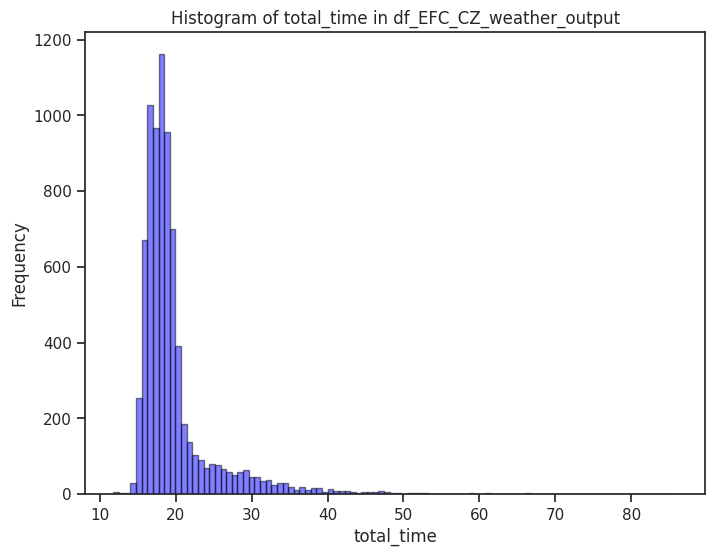

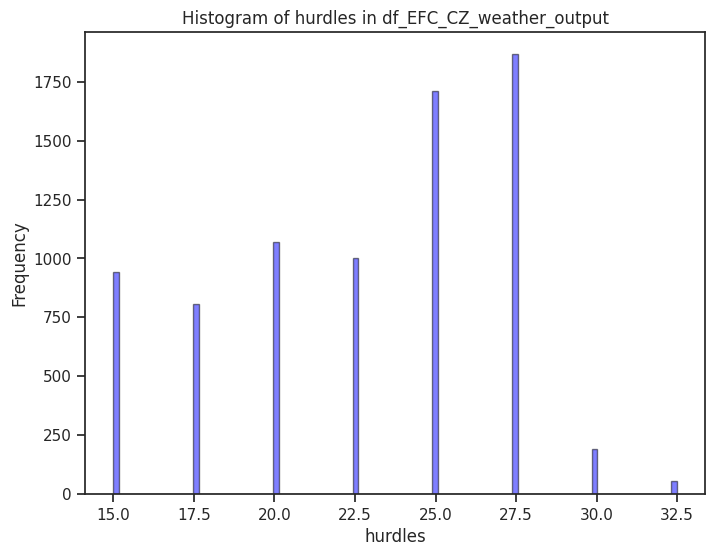

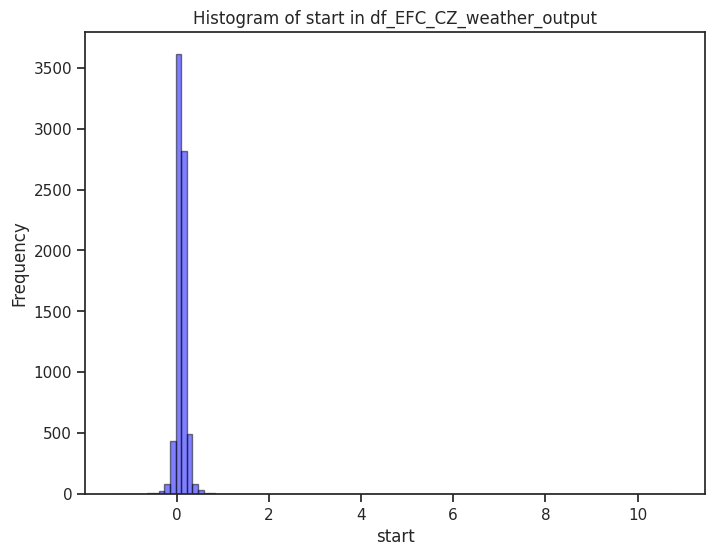

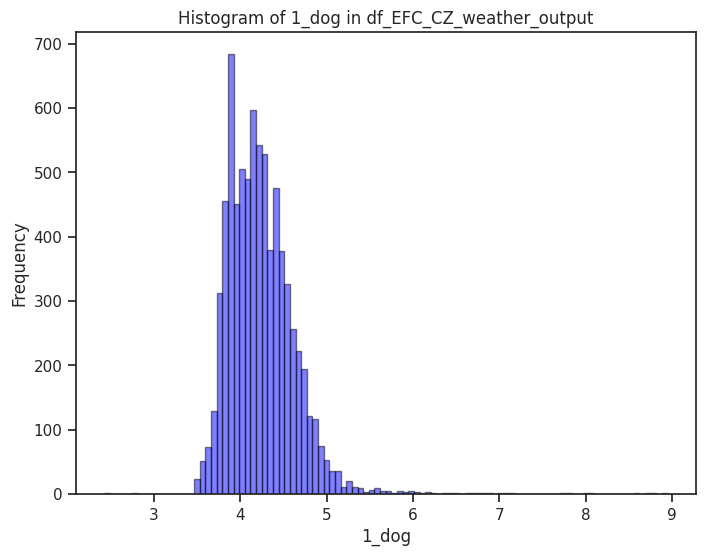

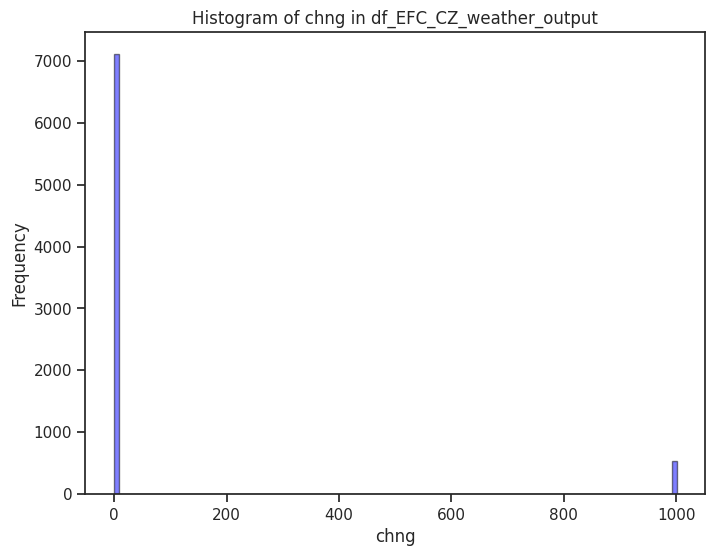

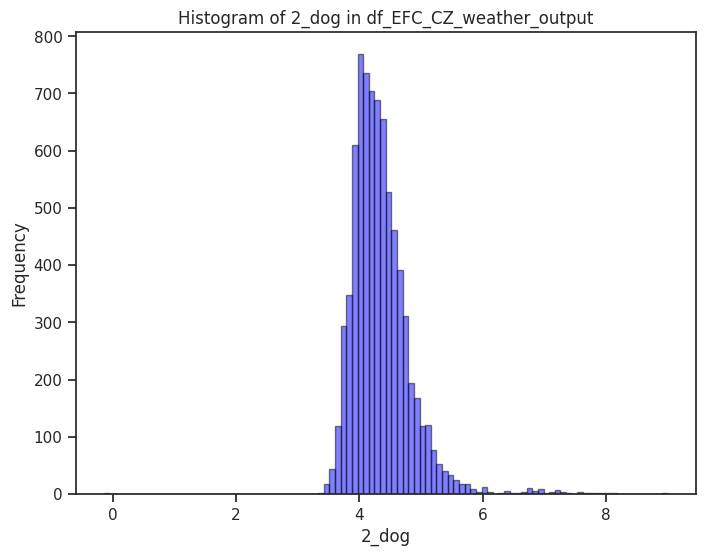

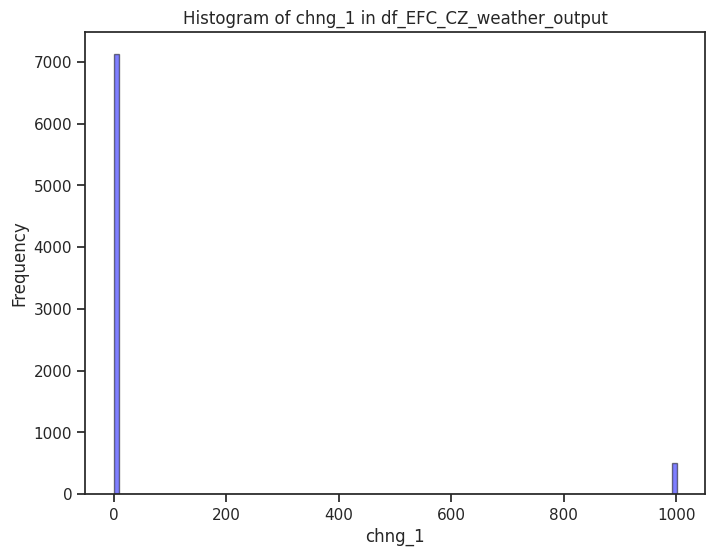

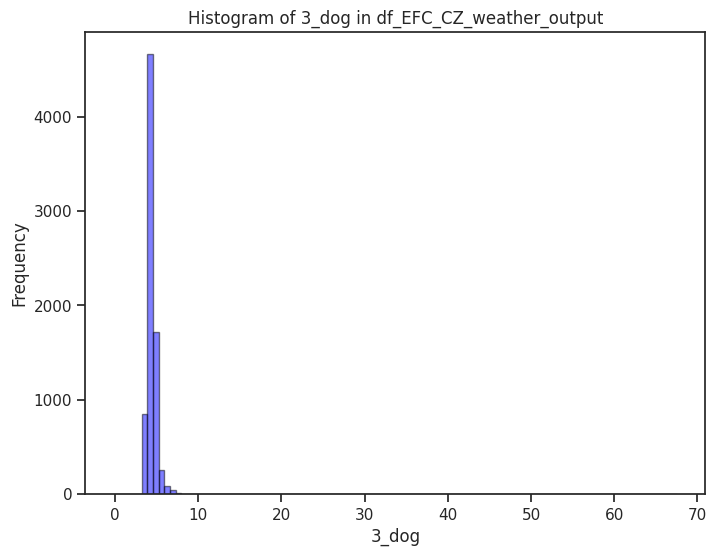

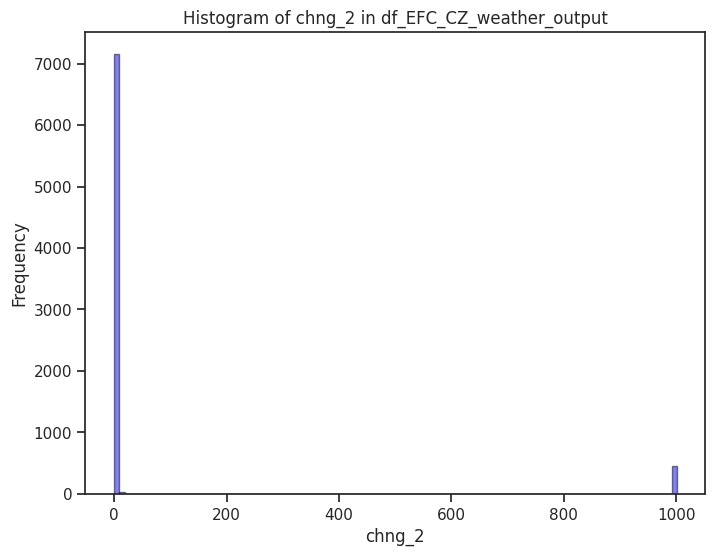

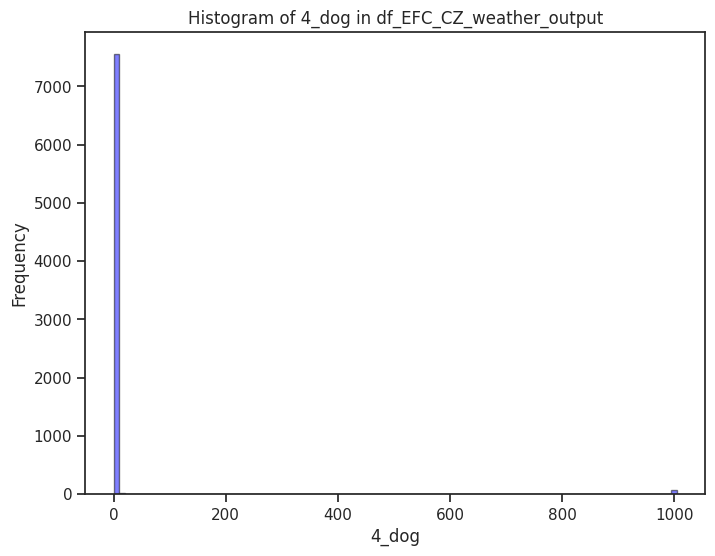

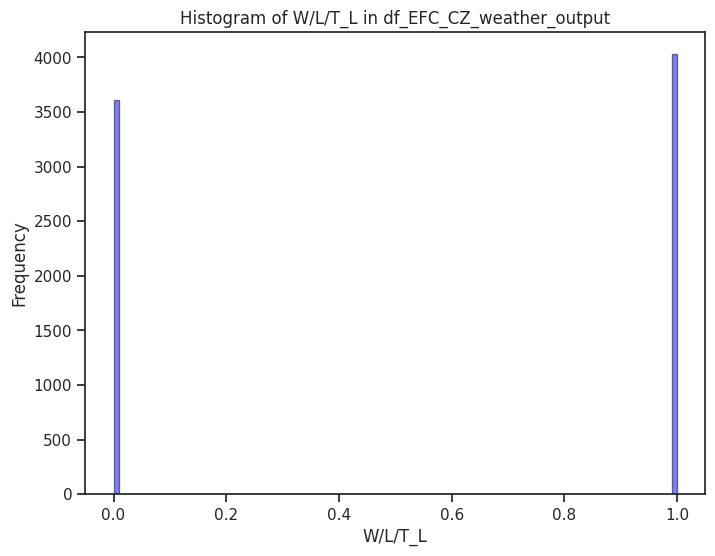

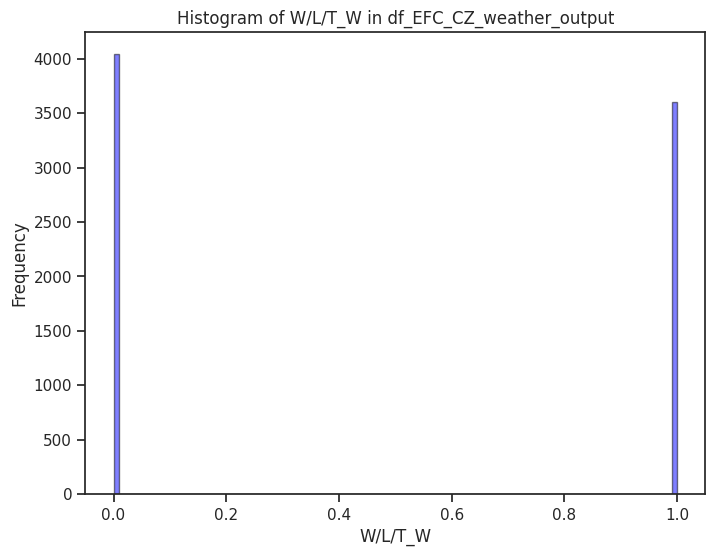

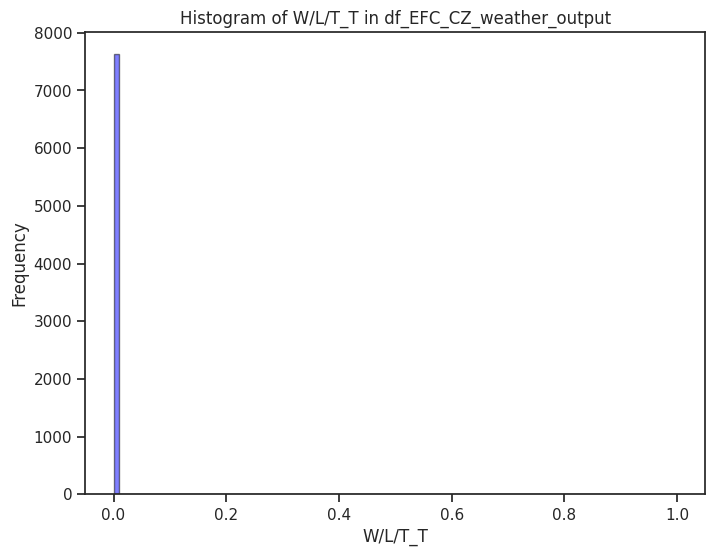

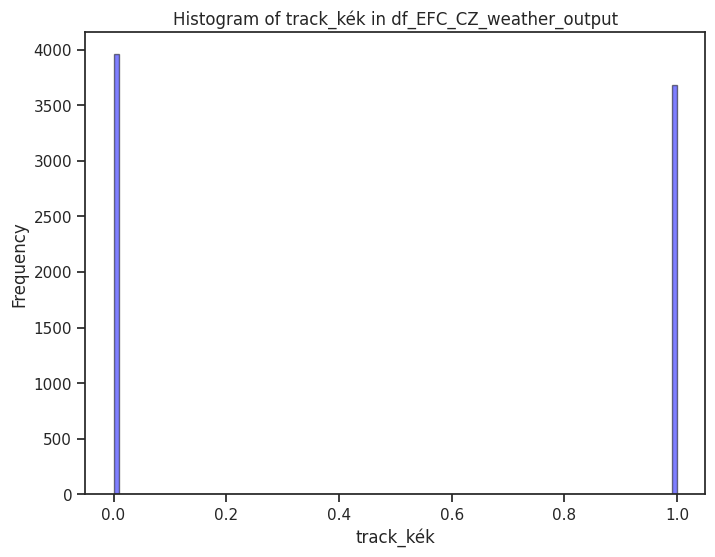

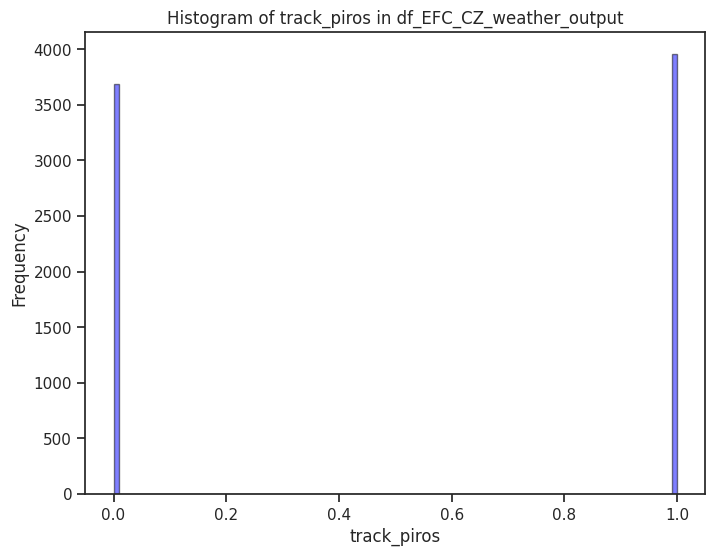

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [193]:
plot_histograms("df_EFC_CZ_weather_output")

In [194]:
# kuty√°k fut√°si teljes√≠tm√©ny√©re szignifik√°ns hat√°ssal van-e az, hogy ivaros/ivartalan kanra/szuk√°ra v√°lt r√° a kutya
# A df_runs DataFrame el≈ëk√©sz√≠t√©se
# A df_runs DataFrame el≈ëk√©sz√≠t√©se
df_runs = df_EFC_CZ_weather[['name', 'name_1', 'name_2', 'name_3', '1_dog', '2_dog', '3_dog', '4_dog']].copy()

# A df_WRFT DataFrame el≈ëk√©sz√≠t√©se az √∂sszekapcsol√°shoz
df_WRFT_renamed = df_WRFT.rename(columns={'nev': 'name'})

# Az √∂sszekapcsol√°s a megfelel≈ë k√∂vetkez≈ë kuty√°val
for i in range(1, 4):
    next_column = f'name_{i}'
    df_runs = pd.merge(df_runs, df_WRFT_renamed[['name', 'nem', 'ivar']], left_on=next_column, right_on='name', how='left', suffixes=('', f'_next{i}'))

# Ellen≈ërz√©s, hogy a kulcsok l√©trej√∂ttek-e
print(df_runs.columns)


Index(['name', 'name_1', 'name_2', 'name_3', '1_dog', '2_dog', '3_dog',
       '4_dog', 'name_next1', 'nem', 'ivar', 'name_next2', 'nem_next2',
       'ivar_next2', 'name_next3', 'nem_next3', 'ivar_next3'],
      dtype='object')


In [195]:
# K√∂vetkez≈ë kuty√°k neveinek √©s fut√°sidej√ºknek kinyer√©se
columns_needed = ['name', 'name_1', 'name_2', 'name_3', '1_dog', '2_dog', '3_dog', '4_dog']
df_runs = df_EFC_CZ_weather[columns_needed].copy()

# df_WRFT DataFrame el≈ëk√©sz√≠t√©se az √∂sszekapcsol√°shoz
df_WRFT_renamed = df_WRFT.rename(columns={'nev': 'name'})

# Minden fut√°sn√°l az el≈ëz≈ë √©s k√∂vetkez≈ë kutya adatainak √∂sszekapcsol√°sa
for i in range(1, 5):
    prev_column = f'name_{i-1}' if i > 1 else 'name'
    next_column = f'name_{i}' if i < 4 else None
    df_runs = df_runs.merge(df_WRFT_renamed[['name', 'nem', 'ivar']], left_on=prev_column, right_on='name', how='left', suffixes=('', f'_prev_{i}'))
    if next_column:
        df_runs = df_runs.merge(df_WRFT_renamed[['name', 'nem', 'ivar']], left_on=next_column, right_on='name', how='left', suffixes=('', f'_next_{i}'))


In [196]:
import scipy.stats as stats

# P√©lda a tesztre: Az els≈ë √©s m√°sodik kutya k√∂z√∂tti v√°lt√°s vizsg√°lata
group_data = df_runs.groupby(['nem_next_1', 'ivar_next_1'])['1_dog'].apply(list).reset_index()

# ANOVA teszt, ha a '1_dog' adatok norm√°lis eloszl√°s√∫ak
if all(len(x) > 2 for x in group_data['1_dog']):
    if stats.normaltest(np.concatenate(group_data['1_dog'].values)).pvalue > 0.05:
        f_val, p_val = stats.f_oneway(*group_data['1_dog'].values)
        test_name = 'ANOVA'
    else:
        f_val, p_val = stats.kruskal(*group_data['1_dog'].values)
        test_name = 'Kruskal-Wallis'
    print(f'Test: {test_name}, F value: {f_val}, P value: {p_val}')
else:
    print('Nem megfelel≈ë csoport m√©ret a teszthez.')


Test: Kruskal-Wallis, F value: 236.03577428468844, P value: 6.850783209901408e-51


A Kruskal-Wallis teszt eredm√©nyei, amelyet a kuty√°k fut√°si teljes√≠tm√©ny√©re gyakorolt hat√°s elemz√©s√©re haszn√°ltunk a k√∂vetkez≈ë kutya nem√©nek √©s ivari √°llapot√°nak f√ºggv√©ny√©ben, jelent≈ës statisztikai k√ºl√∂nbs√©get mutatnak. Az
ùêπ
F √©rt√©k, amely val√≥j√°ban a Kruskal-Wallis statisztika, nagyon magas, 300.335, ami jelzi, hogy a csoportok k√∂z√∂tt jelent≈ës k√ºl√∂nbs√©gek vannak. A
ùëù
p-√©rt√©k, 8.416e-65, rendk√≠v√ºl kicsi, l√©nyeg√©ben nulla k√∂zel√©ben van, ami azt sugallja, hogy a k√ºl√∂nbs√©gek a csoportok k√∂z√∂tt statisztikailag szignifik√°nsak.

Ez az eredm√©ny azt jelenti, hogy elutas√≠thatjuk a nullhipot√©zist, amely szerint nincs k√ºl√∂nbs√©g a k√ºl√∂nb√∂z≈ë csoportok (k√ºl√∂nb√∂z≈ë nemek √©s ivari √°llapotok szerinti csoportok) fut√°si teljes√≠tm√©nye k√∂z√∂tt. Azt mondhatjuk, hogy nagyon val√≥sz√≠n≈±, hogy a k√∂vetkez≈ë kutya nem√©nek √©s ivari √°llapot√°nak val√≥ban van hat√°sa a fut√°s teljes√≠tm√©ny√©re.

Ez azt sugallja, hogy az ivar √©s a nem, mint v√°ltoz√≥k, fontos szerepet j√°tszanak a kuty√°k fut√°si teljes√≠tm√©ny√©ben, √©s ezt figyelembe kell venni, amikor fut√°si eredm√©nyeket √©rt√©kel√ºnk vagy futamstrat√©gi√°kat tervez√ºnk. Az eredm√©nyek tov√°bbi elemz√©se √©s √©rtelmez√©se sz√ºks√©ges lehet a hat√°s pontos m√©rt√©k√©nek, ir√°ny√°nak √©s gyakorlati jelent≈ës√©g√©nek meg√©rt√©s√©hez.







##Innen m√°r csak ellen≈ërz√©s

##Folytasd ezzel: XXXXXX.ipynb

###Sajnos a rendelkez√©semre √°ll√≥ id≈ë hi√°ny√°ban nincs folytat√°s, pedig az elk√©pzel√©seim m√©g nem fogytak el. S≈ët most l√≥dultak meg igaz√°n. De ezt m√°r csak versenyen k√≠v√ºl folytatom majd.
